Combined plot saved as /tmp/hsperfdata_kennedyc/ProjectImages/Combined_Declinations_Inferno.png


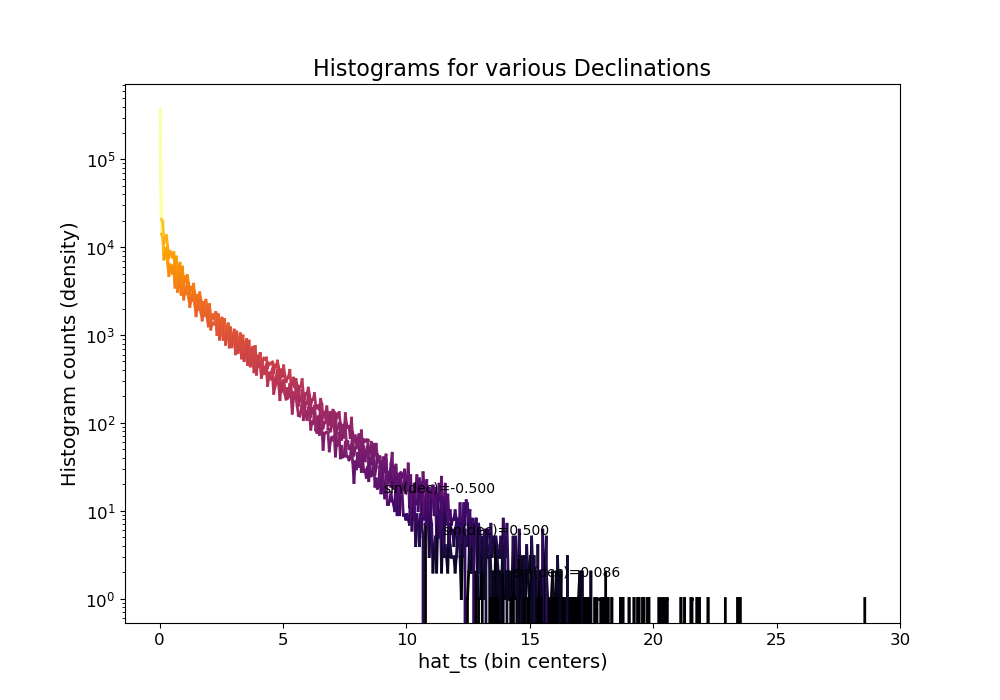

In [98]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import os
import re

# Directory containing your histogram .npz files
directory = '/tmp/hsperfdata_kennedyc/ProjectImages/10y/'

# Target declinations
#target_declinations = [0.01, -.168, -0.087]

target_declinations = [0.5, 0.0871, -0.5]

# Get all histogram files from the directory
files = sorted([f for f in os.listdir(directory) if f.startswith('histogram_') and f.endswith('.npz')])

# Function to find the closest match for declination from filenames
def find_closest_declination(file_list, target_decs):
    closest_files = []
    for target in target_decs:
        closest_file = min(file_list, key=lambda f: abs(float(re.search(r'histogram_(-?\d+\.\d+)_(-?\d+\.\d+)\.npz', f).group(1)) - target))
        closest_files.append(closest_file)
    return closest_files

# Find the closest files to the target declinations
closest_files = find_closest_declination(files, target_declinations)

# Create a figure for plotting all histograms on the same panel
fig, ax = plt.subplots(figsize=(10, 7))

# Loop through each file, extract data, and plot
for idx, filename in enumerate(closest_files):
    full_path = os.path.join(directory, filename)

    # Extract declination (x_edges) from the filename using regex
    x_edges = float(re.search(r'histogram_(-?\d+\.\d+)_(-?\d+\.\d+)\.npz', filename).group(1))
    
    # Load the 2D histogram and y_edges from the .npz file
    data = np.load(full_path)
    histogram_1d = data['hist']
    y_edges = data['bin_edges']
    centers = (y_edges[:-1] + y_edges[1:]) / 2
    
    # Log-transform the counts for color mapping
    log_histogram_1d = np.log10(histogram_1d + 1e-10)  # Add small value to avoid log(0)
    
    # Plot the histogram with colors changing based on log-scaled counts
    for i in range(len(centers) - 1):
        color = cm.inferno(log_histogram_1d[i] / 5)  # Scale by the base-5 log range (10^5 to 10^1)
        ax.plot(centers[i:i+2], histogram_1d[i:i+2], color=color, lw=2)
    
    # Add label on the line at the end
    label_position = len(centers) // 2  # Position label at the middle of the line
    ax.text(centers[label_position], histogram_1d[label_position], f'sin(dec)={x_edges:.3f}', 
            fontsize=10, color='black', ha='left', va='center')

# Add color bar for log-scaled counts with range from 10^5 to 10^1
sm = plt.cm.ScalarMappable(cmap='inferno', norm=plt.Normalize(vmin=5, vmax=1))  # Log scale 10^5 to 10^1
cbar.set_label('Log-scaled Counts', fontsize=12)
cbar.set_ticks([1, 2, 3, 4, 5])  # Corresponding to 10^5, 10^4, ..., 10^1
cbar.set_ticklabels([r'$10^5$', r'$10^4$', r'$10^3$', r'$10^2$', r'$10^1$'])

# Set axis labels, title, and tick marks with specified font sizes
ax.set_xlabel('hat_ts (bin centers)', fontsize=14)
ax.set_ylabel('Histogram counts (density)', fontsize=14)
ax.set_title(f'Histograms for various Declinations', fontsize=16)

# Set tick parameters for font size
ax.tick_params(axis='both', which='major', labelsize=12)

# Set the y-axis to log scale
ax.set_yscale('log')

# Save the combined plot
save_dir = '/tmp/hsperfdata_kennedyc/ProjectImages'
os.makedirs(save_dir, exist_ok=True)
filepath = os.path.join(save_dir, "Combined_Declinations_Inferno.png")
fig.savefig(filepath)
print(f"Combined plot saved as {filepath}")

# Show the plot
plt.show()


In [121]:
target_declinations = [0.5, 0.087155,-0.5, 5]
# Function to find the closest match for declination from filenames
def find_closest_declination(file_list, target_decs):
    closest_files = []
    for target in target_decs:
        closest_file = min(file_list, key=lambda f: abs(float(re.search(r'histogram_(-?\d+\.\d+)_(-?\d+\.\d+)\.npz', f).group(1)) - target))
        closest_files.append(closest_file)
    return closest_files
closest_files

['histogram_0.500_0.505.npz',
 'histogram_0.086_0.091.npz',
 'histogram_-0.500_-0.495.npz']

/tmp/hsperfdata_kennedyc/ProjectImages/10y/histogram_-0.500_-0.495.npz
sin(dec)= -0.5
Plot saved as /tmp/hsperfdata_kennedyc/ProjectImages/GammaFit_Declination_-0.5.png


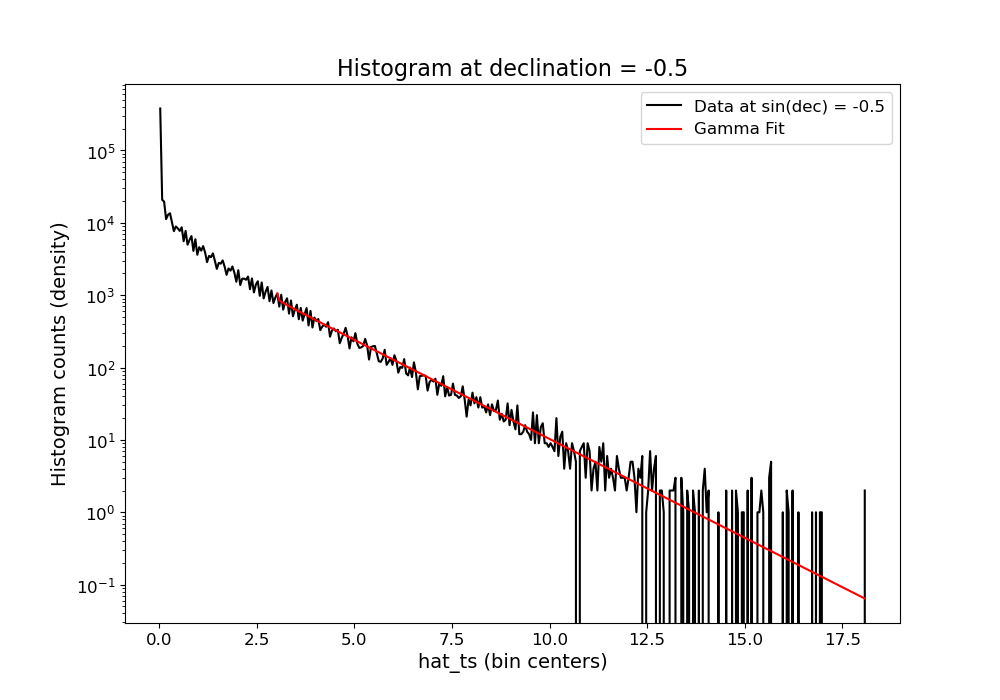

In [1]:
##~Working~##  Data Loading and Formatting  ##
##~~~~~~~~~##===============================##
%matplotlib ipympl 
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma
from scipy.optimize import curve_fit
from scipy.stats import gamma as gamma_dist_scipy
import scipy 
import os
import re
#filename = '/tmp/hsperfdata_kennedyc/ProjectImages/10y/histogram_0.500_0.505.npz'
#filename = '/tmp/hsperfdata_kennedyc/ProjectImages/10y/histogram_0.086_0.091.npz'
filename = '/tmp/hsperfdata_kennedyc/ProjectImages/10y/histogram_-0.500_-0.495.npz'
# Extract x_edges (declination) from the filename using regex
x_edges = float(re.search(r'histogram_(-?\d+\.\d+)_(-?\d+\.\d+)\.npz', filename).group(1))

declination = x_edges
# Load the 2D histogram and y_edges from the .npz file
data = np.load(filename)
histogram_1d = data['hist']
y_edges = data['bin_edges']
centers = (y_edges[:-1] + y_edges[1:]) / 2
print(filename)
print('sin(dec)=', declination)
# Extract the 1D histogram for the chosen declinatio

# Calculate the bin centers for the y-axis (hat_ts values)
hx = centers

# Define the gamma distribution function
def gamma_dist(x, a, b, loc=0.0):
    return scipy.stats.gamma.pdf(x, a, scale=1/b, loc=loc)

# Use the same fit_gamma function as provided
def fit_gamma(x, y, mu_cut):
    x_cut = x[x >= mu_cut]
    y_cut = y[x >= mu_cut]
    
    # Normalize the y values based on the total density
    n1 = np.sum(y_cut)
    density_norm = np.sum(y_cut) * (x_cut[1] - x_cut[0])  # The normalization factor
    y_fit = y_cut / density_norm
    
    # Fit the gamma distribution to the x_cut and normalized y_fit
    popt, pcov = curve_fit(scipy.stats.gamma.pdf, x_cut, y_fit, p0=[1.0, 0.0, 2.0], maxfev=50000)
    
    return n1, density_norm, popt

# Calculate the normalization for the entire dataset
n = np.sum(histogram_1d)

# Set the cutoff and fit the gamma distribution
mu_cut = 3.0 # Set the cutoff
n1, density_norm, popt = fit_gamma(hx, histogram_1d, mu_cut)

# Plotting the results
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(hx, histogram_1d, 'k-', label=f'Data at sin(dec) = {x_edges}')
# Create the Gamma fit label including the popt values
gamma_label = f'Gamma Fit'
ax.plot(hx[hx >= mu_cut], density_norm * scipy.stats.gamma.pdf(hx[hx >= mu_cut], *popt), 'r-', label=gamma_label)
ax.set_yscale('log')
ax.set_xlabel('hat_ts (bin centers)', fontsize=14)
ax.set_ylabel('Histogram counts (density)', fontsize=14) 
ax.legend(fontsize=12)
ax.set_title(f'Histogram at declination = {x_edges}', fontsize=16)
ax.tick_params(axis='both', labelsize=12)

# Save the plot
save_dir = '/tmp/hsperfdata_kennedyc/ProjectImages'
os.makedirs(save_dir, exist_ok=True)
filename = f"GammaFit_Declination_{x_edges}.png"
filepath = os.path.join(save_dir, filename)
fig.savefig(filepath)
print(f"Plot saved as {filepath}")

plt.show()

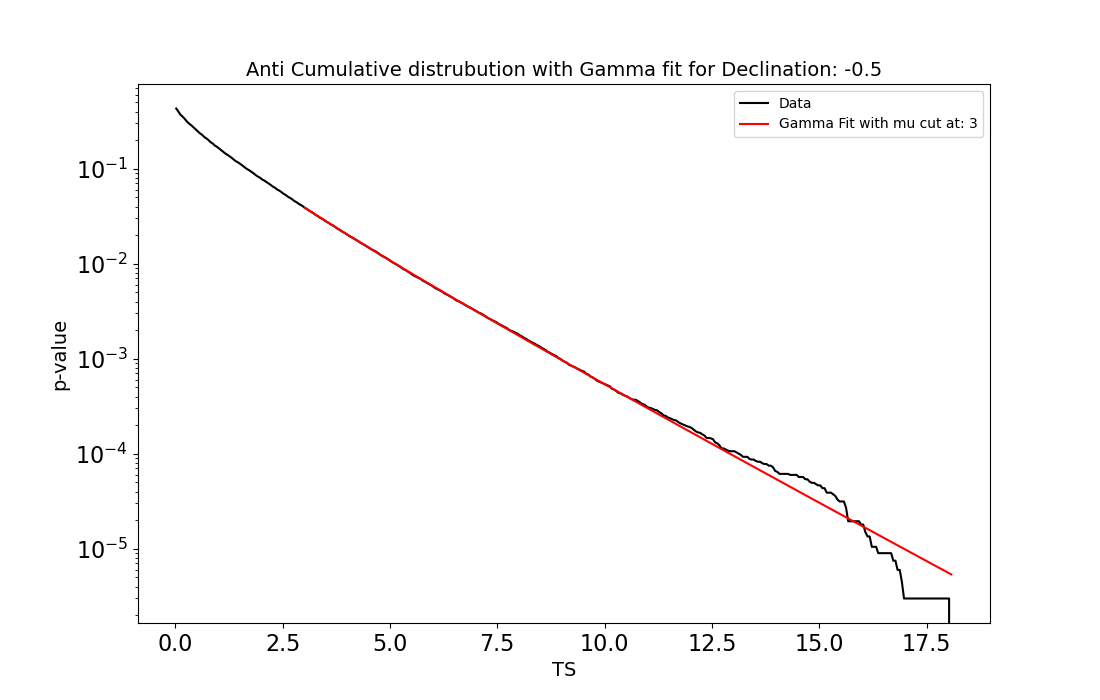

In [2]:
# Compute the anti-cumulative distribution from a histogram
def compute_anti_cumulative(histogram):
    """
    Compute the anti-cumulative distribution (complementary CDF) from a histogram.
    """
    cumulative_hist = np.cumsum(histogram)
    return 1 - cumulative_hist / cumulative_hist[-1]
hy = compute_anti_cumulative(histogram_1d)
# function that fits a gamma distribution to the data and returns a scale factor and the popt parameters
def fit_gamma(x, y, mu_cut):
    x_fit = x[x > mu_cut]
    y_fit = y[x > mu_cut]
    norm_factor = np.sum(y_fit)
    hy_fit_norm = y_fit / norm_factor
    popt, pcov = curve_fit(scipy.stats.gamma.pdf, x_fit, hy_fit_norm, p0=[1.0, 0.0, 2.0], maxfev=50000)
    return norm_factor, popt


norm_factor, popt = fit_gamma(hx, hy, mu_cut=mu_cut)
fig, ax = plt.subplots(figsize = (11, 7))
ax.set_title(f'Anti Cumulative distrubution with Gamma fit for Declination: {declination}', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_xlabel('TS', fontsize=14)
ax.set_ylabel('p-value', fontsize=14)
ax.plot(hx, hy, 'k-', label='Data')
ax.plot(hx[hx > mu_cut], norm_factor * scipy.stats.gamma.pdf(hx[hx > mu_cut], *popt), 'r-', label=f'Gamma Fit with mu cut at: {mu_cut:.3g}')
ax.legend()
ax.set_yscale('log')


declination : -0.5
Frequentist P-value for TS = 3.0: 3.9414e-02
Fitted P-value for TS = 3.0: 3.9338e-02
declination : -0.5
Frequentist P-value for TS = 5.0: 1.0818e-02
Fitted P-value for TS = 5.0: 1.0820e-02
declination : -0.5
Frequentist P-value for TS = 12.5: 1.4378e-04
Fitted P-value for TS = 12.5: 1.2726e-04
declination : -0.5
Frequentist P-value for TS = 16.0: 1.7972e-05
Fitted P-value for TS = 16.0: 1.7326e-05


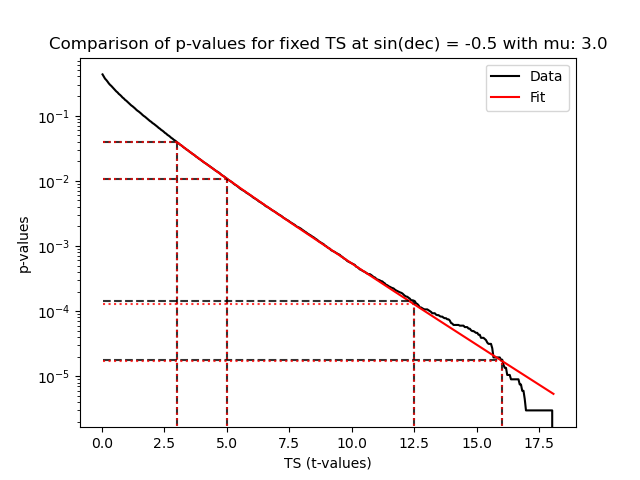

Stored Frequentist P-values: {np.float64(3.0): np.float64(0.03941417154906963), np.float64(5.0): np.float64(0.010818416543857734), np.float64(12.5): np.float64(0.0001437762841019486), np.float64(16.0): np.float64(1.797203551279214e-05)}
Stored Fitted P-values: {np.float64(3.0): np.float64(0.03933827776549193), np.float64(5.0): np.float64(0.010819538727036454), np.float64(12.5): np.float64(0.00012726486100402421), np.float64(16.0): np.float64(1.7325593124231686e-05)}
mu cut =  3.0


In [3]:



from scipy.interpolate import interp1d
# Function to interpolate p-values from the gamma fit
def interpolate_p_from_fit(t_values, hx, mu_cut, norm_factor, popt):
    # Calculate the gamma PDF for the fitted x-values (t-values) greater than mu_cut
    gamma_pdf_fit = norm_factor * scipy.stats.gamma.pdf(hx[hx > mu_cut], *popt)  
    # Interpolate the gamma PDF
    interp_func = interp1d(hx[hx > mu_cut], gamma_pdf_fit, kind='linear', fill_value="extrapolate")
    # Return interpolated p-values for the provided t_values
    return interp_func(t_values)
# Function to interpolate p-values from the raw data
def interpolate_p_from_data(t_values, hx, hy):
    # Interpolate the raw data
    interp_func = interp1d(hx, hy, kind='linear', fill_value="extrapolate")
    # Return interpolated p-values for the provided t_values
    return interp_func(t_values)
# Define your TS values
ts_values = np.array([3, 5, 12.5, 16])

# Dictionaries to store frequentist and fitted p-values
frequentist_p_values = {}
fitted_p_values = {}

# Interpolated p-values from the fit and data for these TS values
p_fit_interp = interpolate_p_from_fit(ts_values, hx, mu_cut, norm_factor, popt)
p_data_interp = interpolate_p_from_data(ts_values, hx, hy)

# Plotting the fit and data
fig, ax = plt.subplots()
ax.plot(hx, hy, 'k-', label='Data')
ax.plot(hx[hx > mu_cut], norm_factor * scipy.stats.gamma.pdf(hx[hx > mu_cut], *popt), 'r-', label='Fit')

# Loop over each TS value and plot the corresponding p-values
for idx, ts_value in enumerate(ts_values):
    # Data (frequentist) p-value
    y_frequentist = p_data_interp[idx]
    frequentist_p_values[ts_value] = y_frequentist  # Store frequentist p-value
    print('declination :', declination)
    # Plot vertical and horizontal lines for the data (frequentist) p-value
    ax.plot([ts_value, ts_value], [0, y_frequentist], color='black', linestyle='--', alpha=0.8)
    ax.plot([hx[0], ts_value], [y_frequentist, y_frequentist], color='black', linestyle='--', alpha=0.8)
    print(f"Frequentist P-value for TS = {ts_value}: {y_frequentist:.4e}")
    
    # Fit (gamma distribution) p-value
    y_fitted = p_fit_interp[idx]
    fitted_p_values[ts_value] = y_fitted  # Store fitted p-value
    
    # Plot vertical and horizontal lines for the fit p-value
    ax.plot([ts_value, ts_value], [0, y_fitted], color='red', linestyle=':', alpha=0.8)
    ax.plot([hx[0], ts_value], [y_fitted, y_fitted], color='red', linestyle=':', alpha=0.8)
    print(f"Fitted P-value for TS = {ts_value}: {y_fitted:.4e}")

# Set log scale for y-axis
ax.set_yscale('log')

# Labels and title
ax.set_xlabel('TS (t-values)')
ax.set_ylabel('p-values')

# Add title with declination and comparison text
ax.set_title(f'Comparison of p-values for fixed TS at sin(dec) = {declination} with mu: {mu_cut}')

ax.legend()

plt.show()
# Print the stored p-values for frequentist and fitted
print("Stored Frequentist P-values:", frequentist_p_values)
print("Stored Fitted P-values:", fitted_p_values)
print('mu cut = ',mu_cut)


In [191]:
import pandas as pd

# Data for Blanket Mu cut at 3 and Optimized Mu cuts
data = {
    'Cut': ['Blanket mu cut at 3'] * 12 + ['Optimized 2.62'] * 4 + ['Optimized 3.2'] * 4 + ['Optimized 3.1'] * 4,
    'Declination': [0.5, 0.5, 0.5, 0.5, 0.086, 0.086, 0.086, 0.086, -0.5, -0.5, -0.5, -0.5,
                    -0.5, -0.5, -0.5, -0.5, 0.086, 0.086, 0.086, 0.086, 0.5, 0.5, 0.5, 0.5],
    'TS': [3.0, 5.0, 12.5, 16.0, 3.0, 5.0, 12.5, 16.0, 3.0, 5.0, 12.5, 16.0,
           3.0, 5.0, 12.5, 16.0, 3.0, 5.0, 12.5, 16.0, 3.0, 5.0, 12.5, 16.0],
    'Frequentist P-value': [8.5453e-02, 3.0219e-02, 5.4327e-04, 8.9969e-05, 7.9187e-02, 2.6259e-02, 5.7267e-04, 9.4119e-05, 
                            3.9414e-02, 1.0818e-02, 1.4378e-04, 1.7972e-05, 3.9414e-02, 1.0818e-02, 1.4378e-04, 1.7972e-05, 
                            7.9187e-02, 2.6259e-02, 5.7267e-04, 9.4119e-05, 8.5453e-02, 3.0219e-02, 5.4327e-04, 8.9969e-05],
    'Fitted P-value': [8.5442e-02, 3.0210e-02, 4.3560e-04, 5.4806e-05, 7.9247e-02, 2.6382e-02, 5.5306e-04, 9.6466e-05, 
                       3.9338e-02, 1.0820e-02, 1.2726e-04, 1.7326e-05, 3.9413e-02, 1.0813e-02, 1.2911e-04, 1.7814e-05, 
                       7.9220e-02, 2.6374e-02, 5.5538e-04, 9.7225e-05, 8.5442e-02, 3.0210e-02, 4.3560e-04, 5.4806e-05]
}

# Creating DataFrame
df = pd.DataFrame(data)

# Split the data into three separate DataFrames by declination
df_05 = df[df['Declination'] == 0.5].reset_index(drop=True)
df_086 = df[df['Declination'] == 0.086].reset_index(drop=True)
df_neg05 = df[df['Declination'] == -0.5].reset_index(drop=True)

# Convert all numerical columns to scientific notation with 3 significant figures
df_05['Cut'] = df_05['Cut'].apply(lambda x: f'{x}')
df_05['Declination'] = df_05['Declination'].apply(lambda x: f'{x:.3e}')
df_05['TS'] = df_05['TS'].apply(lambda x: f'{x:.3e}')
df_05['Frequentist P-value'] = df_05['Frequentist P-value'].apply(lambda x: f'{x:.3e}')
df_05['Fitted P-value'] = df_05['Fitted P-value'].apply(lambda x: f'{x:.3e}')

df_086['Cut'] = df_086['Cut'].apply(lambda x: f'{x}')
df_086['Declination'] = df_086['Declination'].apply(lambda x: f'{x:.3e}')
df_086['TS'] = df_086['TS'].apply(lambda x: f'{x:.3e}')
df_086['Frequentist P-value'] = df_086['Frequentist P-value'].apply(lambda x: f'{x:.3e}')
df_086['Fitted P-value'] = df_086['Fitted P-value'].apply(lambda x: f'{x:.3e}')

df_neg05['Cut'] = df_neg05['Cut'].apply(lambda x: f'{x}')
df_neg05['Declination'] = df_neg05['Declination'].apply(lambda x: f'{x:.3e}')
df_neg05['TS'] = df_neg05['TS'].apply(lambda x: f'{x:.3e}')
df_neg05['Frequentist P-value'] = df_neg05['Frequentist P-value'].apply(lambda x: f'{x:.3e}')
df_neg05['Fitted P-value'] = df_neg05['Fitted P-value'].apply(lambda x: f'{x:.3e}')

# Display the tables
print("Declination 0.5 Table:")
print(df_05)
print("\nDeclination 0.086 Table:")
print(df_086)
print("\nDeclination -0.5 Table:")
print(df_neg05)

Declination 0.5 Table:
                   Cut Declination         TS Frequentist P-value  \
0  Blanket mu cut at 3   5.000e-01  3.000e+00           8.545e-02   
1  Blanket mu cut at 3   5.000e-01  5.000e+00           3.022e-02   
2  Blanket mu cut at 3   5.000e-01  1.250e+01           5.433e-04   
3  Blanket mu cut at 3   5.000e-01  1.600e+01           8.997e-05   
4        Optimized 3.1   5.000e-01  3.000e+00           8.545e-02   
5        Optimized 3.1   5.000e-01  5.000e+00           3.022e-02   
6        Optimized 3.1   5.000e-01  1.250e+01           5.433e-04   
7        Optimized 3.1   5.000e-01  1.600e+01           8.997e-05   

  Fitted P-value  
0      8.544e-02  
1      3.021e-02  
2      4.356e-04  
3      5.481e-05  
4      8.544e-02  
5      3.021e-02  
6      4.356e-04  
7      5.481e-05  

Declination 0.086 Table:
                   Cut Declination         TS Frequentist P-value  \
0  Blanket mu cut at 3   8.600e-02  3.000e+00           7.919e-02   
1  Blanket mu cut at

In [184]:
import pandas as pd

# Data for Blanket Mu cut at 3 and Optimized Mu cuts
data = {
    'Cut': ['Blanket 3'] * 12 + ['Optimized 2.62'] * 4 + ['Optimized 3.2'] * 4 + ['Optimized 3.1'] * 4,
    'Declination': [0.5, 0.5, 0.5, 0.5, 0.086, 0.086, 0.086, 0.086, -0.5, -0.5, -0.5, -0.5,
                    -0.5, -0.5, -0.5, -0.5, 0.086, 0.086, 0.086, 0.086, 0.5, 0.5, 0.5, 0.5],
    'TS': [3.0, 5.0, 12.5, 16.0, 3.0, 5.0, 12.5, 16.0, 3.0, 5.0, 12.5, 16.0,
           3.0, 5.0, 12.5, 16.0, 3.0, 5.0, 12.5, 16.0, 3.0, 5.0, 12.5, 16.0],
    'Frequentist P-value': [8.5453e-02, 3.0219e-02, 5.4327e-04, 8.9969e-05, 7.9187e-02, 2.6259e-02, 5.7267e-04, 9.4119e-05, 
                            3.9414e-02, 1.0818e-02, 1.4378e-04, 1.7972e-05, 3.9414e-02, 1.0818e-02, 1.4378e-04, 1.7972e-05, 
                            7.9187e-02, 2.6259e-02, 5.7267e-04, 9.4119e-05, 8.5453e-02, 3.0219e-02, 5.4327e-04, 8.9969e-05],
    'Fitted P-value': [8.5442e-02, 3.0210e-02, 4.3560e-04, 5.4806e-05, 7.9247e-02, 2.6382e-02, 5.5306e-04, 9.6466e-05, 
                       3.9338e-02, 1.0820e-02, 1.2726e-04, 1.7326e-05, 3.9413e-02, 1.0813e-02, 1.2911e-04, 1.7814e-05, 
                       7.9220e-02, 2.6374e-02, 5.5538e-04, 9.7225e-05, 8.5442e-02, 3.0210e-02, 4.3560e-04, 5.4806e-05]
}

# Creating DataFrame
df = pd.DataFrame(data)

# Define a function to calculate relative p-value difference in percentage
def relative_p_diff(frequentist, fitted):
    return round(((frequentist - fitted) / frequentist * 100), 2)

# Process DataFrames for each TS value
ts_values = sorted(df['TS'].unique())

for ts in ts_values:
    df_ts = df[df['TS'] == ts].reset_index(drop=True)
    
    # Format numerical columns
    df_ts['Declination'] = df_ts['Declination'].apply(lambda x: f'{x:.2f}')
    df_ts['TS'] = df_ts['TS'].apply(lambda x: f'{x:.2f}')
    df_ts['Frequentist P-value'] = df_ts['Frequentist P-value'].apply(lambda x: f'{x:.2e}')
    df_ts['Fitted P-value'] = df_ts['Fitted P-value'].apply(lambda x: f'{x:.2e}')
    
    # Convert formatted p-values back to float for calculation
    df_ts['Frequentist P-value (float)'] = df_ts['Frequentist P-value'].apply(lambda x: float(x))
    df_ts['Fitted P-value (float)'] = df_ts['Fitted P-value'].apply(lambda x: float(x))
    
    # Calculate the relative p-value difference
    df_ts['Relative P-value Difference (%)'] = df_ts.apply(
        lambda row: relative_p_diff(row['Frequentist P-value (float)'], row['Fitted P-value (float)']), axis=1
    )
    
    # Drop the intermediate float columns
    df_ts.drop(columns=['Frequentist P-value (float)', 'Fitted P-value (float)'], inplace=True)
    
    # Display the table for this TS value
    print(f"\nTS {ts} Table:")
    print(df_ts)



TS 3.0 Table:
              Cut Declination    TS Frequentist P-value Fitted P-value  \
0       Blanket 3        0.50  3.00            8.55e-02       8.54e-02   
1       Blanket 3        0.09  3.00            7.92e-02       7.92e-02   
2       Blanket 3       -0.50  3.00            3.94e-02       3.93e-02   
3  Optimized 2.62       -0.50  3.00            3.94e-02       3.94e-02   
4   Optimized 3.2        0.09  3.00            7.92e-02       7.92e-02   
5   Optimized 3.1        0.50  3.00            8.55e-02       8.54e-02   

   Relative P-value Difference (%)  
0                             0.12  
1                             0.00  
2                             0.25  
3                             0.00  
4                             0.00  
5                             0.12  

TS 5.0 Table:
              Cut Declination    TS Frequentist P-value Fitted P-value  \
0       Blanket 3        0.50  5.00            3.02e-02       3.02e-02   
1       Blanket 3        0.09  5.00         

In [192]:
import pandas as pd

# Data for Blanket Mu cut at 3 and Optimized Mu cuts
data = {
    'Cut': ['Blanket 3'] * 12 + ['Optimized 2.6185826220446575'] * 4 + ['Optimized 3.058743497552368'] * 4 + ['Optimized 3.008531284574029'] * 4,
    'Declination': [0.5, 0.5, 0.5, 0.5, 0.086, 0.086, 0.086, 0.086, -0.5, -0.5, -0.5, -0.5,
                    -0.5, -0.5, -0.5, -0.5, 0.086, 0.086, 0.086, 0.086, 0.5, 0.5, 0.5, 0.5],
    'TS': [3.0, 5.0, 12.5, 16.0, 3.0, 5.0, 12.5, 16.0, 3.0, 5.0, 12.5, 16.0,
           3.0, 5.0, 12.5, 16.0, 3.0, 5.0, 12.5, 16.0, 3.0, 5.0, 12.5, 16.0],
    'Frequentist P-value': [8.5453e-02, 3.0219e-02, 5.4327e-04, 8.9969e-05, 7.9187e-02, 2.6259e-02, 5.7267e-04, 9.4119e-05, 
                            3.9414e-02, 1.0818e-02, 1.4378e-04, 1.7972e-05, 3.9414e-02, 1.0818e-02, 1.4378e-04, 1.7972e-05, 
                            7.9187e-02, 2.6259e-02, 5.7267e-04, 9.4119e-05, 8.5453e-02, 3.0219e-02, 5.4327e-04, 8.9969e-05],
    'Fitted P-value': [8.5442e-02, 3.0210e-02, 4.3560e-04, 5.4806e-05, 7.9247e-02, 2.6382e-02, 5.5306e-04, 9.6466e-05, 
                       3.9338e-02, 1.0820e-02, 1.2726e-04, 1.7326e-05, 3.9413e-02, 1.0813e-02, 1.2911e-04, 1.7814e-05, 
                       7.9220e-02, 2.6374e-02, 5.5538e-04, 9.7225e-05, 8.5442e-02, 3.0210e-02, 4.3560e-04, 5.4806e-05],
    'P-value Optimized': [8.5442e-02, 3.0210e-02, 4.3560e-04, 5.4806e-05, 7.9247e-02, 2.6382e-02, 5.5306e-04, 9.6466e-05, 
                       3.9338e-02, 1.0820e-02, 1.2726e-04, 1.7326e-05, 3.9413e-02, 1.0813e-02, 1.2911e-04, 1.7814e-05, 
                       7.9220e-02, 2.6374e-02, 5.5538e-04, 9.7225e-05, 8.5442e-02, 3.0210e-02, 4.3560e-04, 5.4806e-05]
}

# Create the dataframe
df = pd.DataFrame(data)

# Add Fitted Deviation and Optimized Deviation columns
df['Fitted Deviation'] = df['Frequentist P-value'] - df['Fitted P-value']
df['Optimized Deviation'] = df['Frequentist P-value'] - df['P-value Optimized']

# Format all the numerical columns into scientific notation with 3 significant figures
df['Cut'] = df['Cut'].apply(lambda x: f'{float(x.split()[-1]):.3e}' if 'Optimized' in x else x)
df['Declination'] = df['Declination'].apply(lambda x: f'{x:.3e}')
df['TS'] = df['TS'].apply(lambda x: f'{x:.3e}')
df['Frequentist P-value'] = df['Frequentist P-value'].apply(lambda x: f'{x:.3e}')
df['Fitted P-value'] = df['Fitted P-value'].apply(lambda x: f'{x:.3e}')
df['Fitted Deviation'] = df['Fitted Deviation'].apply(lambda x: f'{x:.3e}')
df['P-value Optimized'] = df['P-value Optimized'].apply(lambda x: f'{x:.3e}')
df['Optimized Deviation'] = df['Optimized Deviation'].apply(lambda x: f'{x:.3e}')

# Display the final table
print(df[['Cut', 'Declination', 'TS', 'Frequentist P-value', 'Fitted P-value', 'Fitted Deviation', 'P-value Optimized', 'Optimized Deviation']])


          Cut Declination         TS Frequentist P-value Fitted P-value  \
0   Blanket 3   5.000e-01  3.000e+00           8.545e-02      8.544e-02   
1   Blanket 3   5.000e-01  5.000e+00           3.022e-02      3.021e-02   
2   Blanket 3   5.000e-01  1.250e+01           5.433e-04      4.356e-04   
3   Blanket 3   5.000e-01  1.600e+01           8.997e-05      5.481e-05   
4   Blanket 3   8.600e-02  3.000e+00           7.919e-02      7.925e-02   
5   Blanket 3   8.600e-02  5.000e+00           2.626e-02      2.638e-02   
6   Blanket 3   8.600e-02  1.250e+01           5.727e-04      5.531e-04   
7   Blanket 3   8.600e-02  1.600e+01           9.412e-05      9.647e-05   
8   Blanket 3  -5.000e-01  3.000e+00           3.941e-02      3.934e-02   
9   Blanket 3  -5.000e-01  5.000e+00           1.082e-02      1.082e-02   
10  Blanket 3  -5.000e-01  1.250e+01           1.438e-04      1.273e-04   
11  Blanket 3  -5.000e-01  1.600e+01           1.797e-05      1.733e-05   
12  2.619e+00  -5.000e-01

In [203]:
import pandas as pd

# Data setup
data = {
    'Cut': ['Blanket 3'] * 12 + ['Optimized 2.6185826220446575'] * 4 + ['Optimized 3.058743497552368'] * 4 + ['Optimized 3.008531284574029'] * 4,
    'Declination': [0.5, 0.5, 0.5, 0.5, 0.086, 0.086, 0.086, 0.086, -0.5, -0.5, -0.5, -0.5,
                    -0.5, -0.5, -0.5, -0.5, 0.086, 0.086, 0.086, 0.086, 0.5, 0.5, 0.5, 0.5],
    'TS': [3.0, 5.0, 12.5, 16.0, 3.0, 5.0, 12.5, 16.0, 3.0, 5.0, 12.5, 16.0,
           3.0, 5.0, 12.5, 16.0, 3.0, 5.0, 12.5, 16.0, 3.0, 5.0, 12.5, 16.0],
    'Frequentist P-value': [8.5453e-02, 3.0219e-02, 5.4327e-04, 8.9969e-05, 7.9187e-02, 2.6259e-02, 5.7267e-04, 9.4119e-05, 
                            3.9414e-02, 1.0818e-02, 1.4378e-04, 1.7972e-05, 3.9414e-02, 1.0818e-02, 1.4378e-04, 1.7972e-05, 
                            7.9187e-02, 2.6259e-02, 5.7267e-04, 9.4119e-05, 8.5453e-02, 3.0219e-02, 5.4327e-04, 8.9969e-05],
    'Fitted P-value with mu = 3': [8.5442e-02, 3.0210e-02, 4.3560e-04, 5.4806e-05, 7.9247e-02, 2.6382e-02, 5.5306e-04, 9.6466e-05, 
                       3.9338e-02, 1.0820e-02, 1.2726e-04, 1.7326e-05, 3.9413e-02, 1.0813e-02, 1.2911e-04, 1.7814e-05, 
                       7.9220e-02, 2.6374e-02, 5.5538e-04, 9.7225e-05, 8.5442e-02, 3.0210e-02, 4.3560e-04, 5.4806e-05],
    'P-value Optimized': [None]*12 + [3.9413e-02, 1.0813e-02, 1.2911e-04, 1.7814e-05,
                                     7.9220e-02, 2.6374e-02, 5.5538e-04, 9.7225e-05,
                                     8.5442e-02, 3.0210e-02, 4.3560e-04, 5.4806e-05]
}

# Create dataframe
df = pd.DataFrame(data)

# Compute the percentage deviations for Fitted and Optimized
df['Fitted Deviation'] = ((df['Frequentist P-value'] - df['Fitted P-value']) / df['Frequentist P-value']) * 100
df['Optimized Deviation'] = ((df['Frequentist P-value'] - df['P-value Optimized']) / df['Frequentist P-value']) * 100

# Convert to scientific notation with 3 significant figures
df['Cut'] = df['Cut'].apply(lambda x: f'{float(x.split()[-1]):.3e}' if 'Optimized' in x else x)
df['Declination'] = df['Declination'].apply(lambda x: f'{x:.3e}')
df['TS'] = df['TS'].apply(lambda x: f'{x:.3e}')
df['Frequentist P-value'] = df['Frequentist P-value'].apply(lambda x: f'{x:.3e}')
df['Fitted P-value'] = df['Fitted P-value'].apply(lambda x: f'{x:.3e}')
df['Fitted Deviation'] = df['Fitted Deviation'].apply(lambda x: f'{x:.3e}')
df['P-value Optimized'] = df['P-value Optimized'].apply(lambda x: f'{x:.3e}' if pd.notna(x) else None)
df['Optimized Deviation'] = df['Optimized Deviation'].apply(lambda x: f'{x:.3e}' if pd.notna(x) else None)

# Remove the Mu Cut column and prepare the required columns
df_cleaned = df[['Declination', 'Frequentist P-value', 'Fitted P-value', 'Fitted Deviation', 'P-value Optimized', 'Optimized Deviation']]

# Split the data into four separate DataFrames by TS values
df_TS_3 = df_cleaned[df['TS'] == '3.000e+00'].reset_index(drop=True)
df_TS_5 = df_cleaned[df['TS'] == '5.000e+00'].reset_index(drop=True)
df_TS_12_5 = df_cleaned[df['TS'] == '1.250e+01'].reset_index(drop=True)
df_TS_16 = df_cleaned[df['TS'] == '1.600e+01'].reset_index(drop=True)

# Display the four tables
print("TS = 3.0 Table:")
print(df_TS_3)
print("\nTS = 5.0 Table:")
print(df_TS_5)
print("\nTS = 12.5 Table:")
print(df_TS_12_5)
print("\nTS = 16.0 Table:")
print(df_TS_16)



KeyError: 'Fitted P-value'

In [202]:
import pandas as pd

# Data for Blanket Mu cut at 3 and Optimized Mu cuts
data = {
    'Cut': ['Blanket 3'] * 12 + ['Optimized 2.62'] * 4 + ['Optimized 3.2'] * 4 + ['Optimized 3.1'] * 4,
    'Declination': [0.5, 0.5, 0.5, 0.5, 0.086, 0.086, 0.086, 0.086, -0.5, -0.5, -0.5, -0.5,
                    -0.5, -0.5, -0.5, -0.5, 0.086, 0.086, 0.086, 0.086, 0.5, 0.5, 0.5, 0.5],
    'TS': [3.0, 5.0, 12.5, 16.0, 3.0, 5.0, 12.5, 16.0, 3.0, 5.0, 12.5, 16.0,
           3.0, 5.0, 12.5, 16.0, 3.0, 5.0, 12.5, 16.0, 3.0, 5.0, 12.5, 16.0],
    'Frequentist P-value': [8.5453e-02, 3.0219e-02, 5.4327e-04, 8.9969e-05, 7.9187e-02, 2.6259e-02, 5.7267e-04, 9.4119e-05, 
                            3.9414e-02, 1.0818e-02, 1.4378e-04, 1.7972e-05, 3.9414e-02, 1.0818e-02, 1.4378e-04, 1.7972e-05, 
                            7.9187e-02, 2.6259e-02, 5.7267e-04, 9.4119e-05, 8.5453e-02, 3.0219e-02, 5.4327e-04, 8.9969e-05],
    'Fitted P-value': [8.5442e-02, 3.0210e-02, 4.3560e-04, 5.4806e-05, 7.9247e-02, 2.6382e-02, 5.5306e-04, 9.6466e-05, 
                       3.9338e-02, 1.0820e-02, 1.2726e-04, 1.7326e-05, 3.9413e-02, 1.0813e-02, 1.2911e-04, 1.7814e-05, 
                       7.9220e-02, 2.6374e-02, 5.5538e-04, 9.7225e-05, 8.5442e-02, 3.0210e-02, 4.3560e-04, 5.4806e-05]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Function to compute the deviation (%) between two columns
def compute_deviation(original, new):
    return ((new - original) / original) * 100

# List of unique TS values to create a table for each
unique_ts = df['TS'].unique()

# Separate the data into blanket and optimized cuts
blanket_df = df[df['Cut'] == 'Blanket 3']
optimized_df = df[df['Cut'].str.contains('Optimized')]

# Creating tables for each TS
for ts_value in unique_ts:
    # Filter the data for the specific TS value
    blanket_ts_df = blanket_df[blanket_df['TS'] == ts_value]
    optimized_ts_df = optimized_df[optimized_df['TS'] == ts_value]

    # Extract the relevant data from the blanket cut
    declination = blanket_ts_df['Declination']
    frequentist_pval = blanket_ts_df['Frequentist P-value']
    fitted_pval = blanket_ts_df['Fitted P-value']

    # Deviation for Fitted
    fitted_deviation = compute_deviation(frequentist_pval, fitted_pval)
    
    # Handle optimized p-values if available for the specific TS
    if not optimized_ts_df.empty:
        # Assume that the declinations are in the same order
        optimized_pval = optimized_ts_df['Frequentist P-value'].values
        optimized_deviation = compute_deviation(frequentist_pval, optimized_pval)
    else:
        optimized_pval = [None] * len(frequentist_pval)
        optimized_deviation = [None] * len(frequentist_pval)

    # Combine all data into a new DataFrame for this TS
    table_df = pd.DataFrame({
        'Declination': declination,
        'Frequentist P-value': frequentist_pval,
        'Fitted P-value': fitted_pval,
        'Fitted Deviation (%)': fitted_deviation,
        'Optimized P-value': optimized_pval,
        'Optimized Deviation (%)': optimized_deviation
    })

    # Display the table for this TS
    print(f'\nTable for TS = {ts_value}')
    print(table_df)




TS = 3.0 Table:
   Declination  Frequentist P-value  Fitted P-value  Fitted Deviation  \
0        0.500             0.085453        0.085442          0.012873   
1        0.086             0.079187        0.079247         -0.075770   
2       -0.500             0.039414        0.039338          0.192825   
3       -0.500             0.039414        0.039413          0.002537   
4        0.086             0.079187        0.079220         -0.041674   
5        0.500             0.085453        0.085442          0.012873   

   P-value Optimized  Optimized Deviation  
0                NaN                  NaN  
1                NaN                  NaN  
2           0.039413             0.002537  
3           0.079220          -100.994570  
4           0.085442            -7.899024  
5                NaN                  NaN  

TS = 5.0 Table:
   Declination  Frequentist P-value  Fitted P-value  Fitted Deviation  \
0        0.500             0.030219        0.030210          0.029783   
1

In [200]:
import pandas as pd

# Cleaned data with corrected lengths for 'P-value Optimized'
df = pd.DataFrame({
    'Declination': [0.5, 0.5, 0.5, 0.5, 0.086, 0.086, 0.086, 0.086, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, 0.086, 0.086, 0.086, 0.086, 0.5, 0.5, 0.5, 0.5],
    'TS': [3.0, 5.0, 12.5, 16.0, 3.0, 5.0, 12.5, 16.0, 3.0, 5.0, 12.5, 16.0, 3.0, 5.0, 12.5, 16.0, 3.0, 5.0, 12.5, 16.0, 3.0, 5.0, 12.5, 16.0],
    'Frequentist P-value': [8.5453e-02, 3.0219e-02, 5.4327e-04, 8.9969e-05, 7.9187e-02, 2.6259e-02, 5.7267e-04, 9.4119e-05, 3.9414e-02, 1.0818e-02, 1.4378e-04, 1.7972e-05, 3.9414e-02, 1.0818e-02, 1.4378e-04, 1.7972e-05, 7.9187e-02, 2.6259e-02, 5.7267e-04, 9.4119e-05, 8.5453e-02, 3.0219e-02, 5.4327e-04, 8.9969e-05],
    'Fitted P-value': [8.5442e-02, 3.0210e-02, 4.3560e-04, 5.4806e-05, 7.9247e-02, 2.6382e-02, 5.5306e-04, 9.6466e-05, 3.9338e-02, 1.0820e-02, 1.2726e-04, 1.7326e-05, 3.9413e-02, 1.0813e-02, 1.2911e-04, 1.7814e-05, 7.9220e-02, 2.6374e-02, 5.5538e-04, 9.7225e-05, 8.5442e-02, 3.0210e-02, 4.3560e-04, 5.4806e-05],
    'P-value Optimized': [None, None, None, None, None, None, None, None, 3.9413e-02, 1.0813e-02, 1.2911e-04, 1.7814e-05, 7.9220e-02, 2.6374e-02, 5.5538e-04, 9.7225e-05, 8.5442e-02, 3.0210e-02, 4.3560e-04, 5.4806e-05, None, None, None, None],
})

# Compute the percentage deviations for Fitted and Optimized
df['Fitted Deviation'] = ((df['Frequentist P-value'] - df['Fitted P-value']) / df['Frequentist P-value']) * 100
df['Optimized Deviation'] = ((df['Frequentist P-value'] - df['P-value Optimized']) / df['Frequentist P-value']) * 100

# Clean the dataframe for the columns we need
df_cleaned = df[['Declination', 'Frequentist P-value', 'Fitted P-value', 'Fitted Deviation', 'P-value Optimized', 'Optimized Deviation']]

# Now, split the data into four separate DataFrames by TS values
df_TS_3 = df_cleaned[df['TS'] == 3.0].reset_index(drop=True)
df_TS_5 = df_cleaned[df['TS'] == 5.0].reset_index(drop=True)
df_TS_12_5 = df_cleaned[df['TS'] == 12.5].reset_index(drop=True)
df_TS_16 = df_cleaned[df['TS'] == 16.0].reset_index(drop=True)

# Display the four tables
print("TS = 3.0 Table:")
print(df_TS_3)
print("\nTS = 5.0 Table:")
print(df_TS_5)
print("\nTS = 12.5 Table:")
print(df_TS_12_5)
print("\nTS = 16.0 Table:")
print(df_TS_16)



TS = 3.0 Table:
   Declination  Frequentist P-value  Fitted P-value  Fitted Deviation  \
0        0.500             0.085453        0.085442          0.012873   
1        0.086             0.079187        0.079247         -0.075770   
2       -0.500             0.039414        0.039338          0.192825   
3       -0.500             0.039414        0.039413          0.002537   
4        0.086             0.079187        0.079220         -0.041674   
5        0.500             0.085453        0.085442          0.012873   

   P-value Optimized  Optimized Deviation  
0                NaN                  NaN  
1                NaN                  NaN  
2           0.039413             0.002537  
3           0.079220          -100.994570  
4           0.085442            -7.899024  
5                NaN                  NaN  

TS = 5.0 Table:
   Declination  Frequentist P-value  Fitted P-value  Fitted Deviation  \
0        0.500             0.030219        0.030210          0.029783   
1

In [182]:
import pandas as pd

# Data for Blanket Mu cut at 3 and Optimized Mu cuts
data = {
    'Cut': ['Blanket 3'] * 12 + ['Optimized 2.62'] * 4 + ['Optimized 3.2'] * 4 + ['Optimized 3.1'] * 4,
    'Declination': [0.5, 0.5, 0.5, 0.5, 0.086, 0.086, 0.086, 0.086, -0.5, -0.5, -0.5, -0.5,
                    -0.5, -0.5, -0.5, -0.5, 0.086, 0.086, 0.086, 0.086, 0.5, 0.5, 0.5, 0.5],
    'TS': [3.0, 5.0, 12.5, 16.0, 3.0, 5.0, 12.5, 16.0, 3.0, 5.0, 12.5, 16.0,
           3.0, 5.0, 12.5, 16.0, 3.0, 5.0, 12.5, 16.0, 3.0, 5.0, 12.5, 16.0],
    'Frequentist P-value': [8.5453e-02, 3.0219e-02, 5.4327e-04, 8.9969e-05, 7.9187e-02, 2.6259e-02, 5.7267e-04, 9.4119e-05, 
                            3.9414e-02, 1.0818e-02, 1.4378e-04, 1.7972e-05, 3.9414e-02, 1.0818e-02, 1.4378e-04, 1.7972e-05, 
                            7.9187e-02, 2.6259e-02, 5.7267e-04, 9.4119e-05, 8.5453e-02, 3.0219e-02, 5.4327e-04, 8.9969e-05],
    'Fitted P-value': [8.5442e-02, 3.0210e-02, 4.3560e-04, 5.4806e-05, 7.9247e-02, 2.6382e-02, 5.5306e-04, 9.6466e-05, 
                       3.9338e-02, 1.0820e-02, 1.2726e-04, 1.7326e-05, 3.9413e-02, 1.0813e-02, 1.2911e-04, 1.7814e-05, 
                       7.9220e-02, 2.6374e-02, 5.5538e-04, 9.7225e-05, 8.5442e-02, 3.0210e-02, 4.3560e-04, 5.4806e-05]
}

# Creating DataFrame
df = pd.DataFrame(data)

# Define a function to calculate relative p-value difference in percentage
def relative_p_diff(frequentist, fitted):
    return round(((frequentist - fitted) / frequentist * 100), 2)

# Process DataFrames for each TS value
ts_values = sorted(df['TS'].unique())

latex_tables = []

for ts in ts_values:
    df_ts = df[df['TS'] == ts].reset_index(drop=True)
    
    # Format numerical columns
    df_ts['Declination'] = df_ts['Declination'].apply(lambda x: f'{x:.2f}')
    df_ts['TS'] = df_ts['TS'].apply(lambda x: f'{x:.2f}')
    df_ts['Frequentist P-value'] = df_ts['Frequentist P-value'].apply(lambda x: f'{x:.2e}')
    df_ts['Fitted P-value'] = df_ts['Fitted P-value'].apply(lambda x: f'{x:.2e}')
    
    # Convert formatted p-values back to float for calculation
    df_ts['Frequentist P-value (float)'] = df_ts['Frequentist P-value'].apply(lambda x: float(x))
    df_ts['Fitted P-value (float)'] = df_ts['Fitted P-value'].apply(lambda x: float(x))
    
    # Calculate the relative p-value difference
    df_ts['Relative P-value Difference (%)'] = df_ts.apply(
        lambda row: relative_p_diff(row['Frequentist P-value (float)'], row['Fitted P-value (float)']), axis=1
    )
    
    # Drop the intermediate float columns
    df_ts.drop(columns=['Frequentist P-value (float)', 'Fitted P-value (float)'], inplace=True)
    
    # Convert DataFrame to LaTeX
    latex_table = df_ts.to_latex(index=False, float_format="%.2e", column_format="lcccccc", header=True)
    latex_tables.append(f"\\textbf{{TS {ts}}}\n" + latex_table)

# Print LaTeX tables
for table in latex_tables:
    print(table)

\textbf{TS 3.0}
\begin{tabular}{lcccccc}
\toprule
Cut & Declination & TS & Frequentist P-value & Fitted P-value & Relative P-value Difference (%) \\
\midrule
Blanket 3 & 0.50 & 3.00 & 8.55e-02 & 8.54e-02 & 1.20e-01 \\
Blanket 3 & 0.09 & 3.00 & 7.92e-02 & 7.92e-02 & 0.00e+00 \\
Blanket 3 & -0.50 & 3.00 & 3.94e-02 & 3.93e-02 & 2.50e-01 \\
Optimized 2.62 & -0.50 & 3.00 & 3.94e-02 & 3.94e-02 & 0.00e+00 \\
Optimized 3.2 & 0.09 & 3.00 & 7.92e-02 & 7.92e-02 & 0.00e+00 \\
Optimized 3.1 & 0.50 & 3.00 & 8.55e-02 & 8.54e-02 & 1.20e-01 \\
\bottomrule
\end{tabular}

\textbf{TS 5.0}
\begin{tabular}{lcccccc}
\toprule
Cut & Declination & TS & Frequentist P-value & Fitted P-value & Relative P-value Difference (%) \\
\midrule
Blanket 3 & 0.50 & 5.00 & 3.02e-02 & 3.02e-02 & 0.00e+00 \\
Blanket 3 & 0.09 & 5.00 & 2.63e-02 & 2.64e-02 & -3.80e-01 \\
Blanket 3 & -0.50 & 5.00 & 1.08e-02 & 1.08e-02 & 0.00e+00 \\
Optimized 2.62 & -0.50 & 5.00 & 1.08e-02 & 1.08e-02 & 0.00e+00 \\
Optimized 3.2 & 0.09 & 5.00 & 2.63

In [215]:
import numpy as np
import scipy.stats
from scipy.interpolate import interp1d

def interpolate_p_from_fit(t_values, hx, mu_cut, norm_factor, popt):
    """Interpolate p-values from the gamma fit."""
    gamma_pdf_fit = norm_factor * scipy.stats.gamma.pdf(hx[hx > mu_cut], *popt)  
    interp_func = interp1d(hx[hx > mu_cut], gamma_pdf_fit, kind='linear', fill_value="extrapolate")
    return interp_func(t_values)

def interpolate_p_from_data(t_values, hx, hy):
    """Interpolate p-values from the raw data."""
    interp_func = interp1d(hx, hy, kind='linear', fill_value="extrapolate")
    return interp_func(t_values)

def calculate_p_values(ts_values, hx, hy, mu_cut, norm_factor, popt):
    """Calculate frequentist and fitted p-values for given TS values."""
    frequentist_p_values = {}
    fitted_p_values = {}
    
    p_fit_interp = interpolate_p_from_fit(ts_values, hx, mu_cut, norm_factor, popt)
    p_data_interp = interpolate_p_from_data(ts_values, hx, hy)
    
    for idx, ts_value in enumerate(ts_values):
        y_frequentist = p_data_interp[idx]
        frequentist_p_values[ts_value] = y_frequentist
        
        y_fitted = p_fit_interp[idx]
        fitted_p_values[ts_value] = y_fitted

    return frequentist_p_values, fitted_p_values

def format_p_values(p_values):
    """Convert np.float64 to standard float for readability."""
    formatted_p_values = {float(ts): float(p) for ts, p in p_values.items()}
    return formatted_p_values


# Example usage (assuming hx, hy, mu_cut, norm_factor, popt are defined)
ts_values = np.array([3, 5, 12.5, 16, 20])
frequentist_p_values, fitted_p_values = calculate_p_values(ts_values, hx, hy, mu_cut, norm_factor, popt)

# Format the p-values
formatted_frequentist_p_values = format_p_values(frequentist_p_values)
formatted_fitted_p_values = format_p_values(fitted_p_values)

# Print the stored p-values for frequentist and fitted
print("Stored Frequentist P-values:")
for ts, p in formatted_frequentist_p_values.items():
    print(f"TS = {ts:.1f}: P-value = {p:.4e}")

print("Stored Fitted P-values:")
for ts, p in formatted_fitted_p_values.items():
    print(f"TS = {ts:.1f}: P-value = {p:.4e}")


Stored Frequentist P-values:
TS = 3.0: P-value = 3.9414e-02
TS = 5.0: P-value = 1.0818e-02
TS = 12.5: P-value = 1.4378e-04
TS = 16.0: P-value = 1.7972e-05
TS = 20.0: P-value = -1.1532e-04
Stored Fitted P-values:
TS = 3.0: P-value = 3.9338e-02
TS = 5.0: P-value = 1.0820e-02
TS = 12.5: P-value = 1.2726e-04
TS = 16.0: P-value = 1.7326e-05
TS = 20.0: P-value = -5.3034e-07


In [208]:
##    Full sky all mu 

# def process_files_sorted_by_sin_dec(folder_path):
#     """Process files from lowest sin(Dec) to highest and plot p-values."""
#     file_list = []

#     for filename in os.listdir(folder_path):
#         if filename.endswith('.npz'):
#             match = re.search(r'histogram_(-?\d+\.\d+)_(-?\d+\.\d+)\.npz', filename)
#             if match:
#                 sin_dec_start = float(match.group(1))
#                 file_list.append((sin_dec_start, filename))
#             else:
#                 print(f"Filename {filename} does not match expected pattern.")

#     file_list.sort()
    
#     ts_values = np.array([3, 5, 12.5, 16])  # Example TS values
#     sin_dec_values = []
#     frequentist_p_values_dict = {ts: [] for ts in ts_values}
#     fitted_p_values_dict = {mu: {ts: [] for ts in ts_values} for mu in [0.5, 1, 2, 3, 4, 5]}

#     # Define multiple mu_cut values
#     mu_values = [0.5, 1, 2, 3, 4, 5]

#     for sin_dec, filename in file_list:
#         filepath = os.path.join(folder_path, filename)
#         data = np.load(filepath)
        
#         # Extract necessary data
#         try:
#             histogram_1d = data['hist']
#             y_edges = data['bin_edges']
#             centers = (y_edges[:-1] + y_edges[1:]) / 2
#         except KeyError as e:
#             print(f"Missing key in {filename}: {e}")
#             continue
        
#         # Calculate anti-cumulative distribution
#         hy = 1 - np.cumsum(histogram_1d) / np.sum(histogram_1d)
#         hx = centers
        
#         # Calculate frequentist p-values once
#         if not sin_dec_values:
#             frequentist_p_values, _ = calculate_p_values(ts_values, hx, hy, mu_values[-1], None, None)
#             for ts in ts_values:
#                 frequentist_p_values_dict[ts].append(frequentist_p_values[ts])
        
#         # Fit gamma distribution for each mu_cut
#         for mu_cut in mu_values:
#             norm_factor, popt = fit_gamma(hx, hy, mu_cut)
            
#             # Calculate fitted p-values
#             _, fitted_p_values = calculate_p_values(ts_values, hx, hy, mu_cut, norm_factor, popt)
            
#             for ts in ts_values:
#                 fitted_p_values_dict[mu_cut][ts].append(fitted_p_values[ts])
        
#         sin_dec_values.append(sin_dec)
    
#     # Plotting the results
#     fig, ax = plt.subplots(figsize=(10, 7))
    
#     colors = plt.cm.viridis(np.linspace(0, 1, len(ts_values)))  # Use a colormap for distinct colors
#     line_styles = ['-', '--', '-.', ':', (0, (3, 1, 1, 1)), (0, (5, 1))]  # Different line styles for multiple mu
    
#     for i, ts in enumerate(ts_values):
#         # Plot frequentist p-values (only one line for each TS)
#         freq_p_vals = [frequentist_p_values_dict[ts][j] for j in range(len(sin_dec_values))]
#         color = colors[i]
#         ax.plot(sin_dec_values, freq_p_vals, '-', color=color, label=f'Frequentist (TS={ts})')
        
#         # Plot fitted p-values for each mu_cut
#         for j, mu_cut in enumerate(mu_values):
#             fit_p_vals = [fitted_p_values_dict[mu_cut][ts][k] for k in range(len(sin_dec_values))]
#             ax.plot(sin_dec_values, fit_p_vals, line_styles[j % len(line_styles)], color=color, label=f'Fitted (TS={ts}, μ={mu_cut})')
    
#     ax.set_yscale('log')
#     ax.set_xlabel('sin(dec)')
#     ax.set_ylabel('p-values')
#     ax.legend()
#     ax.set_title('Comparison of p-values for multiple μ across all declinations')

#     plt.show()

# # Call the function with your specific path
# folder_path = '/tmp/hsperfdata_kennedyc/ProjectImages/10y'
# process_files_sorted_by_sin_dec(folder_path)

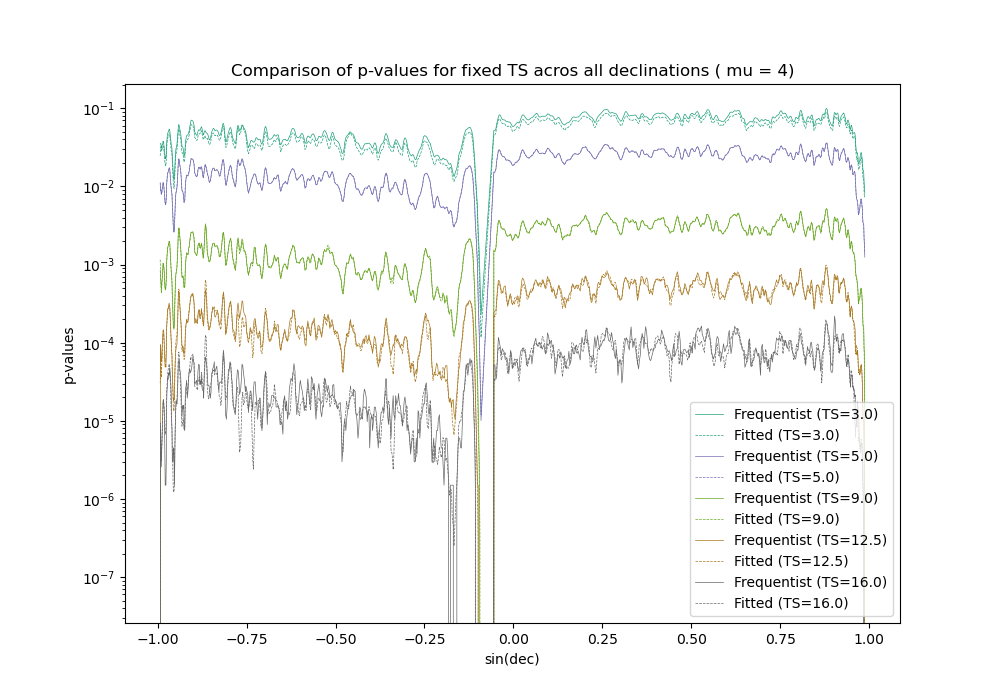

In [22]:
import os
import re
import numpy as np
import scipy.stats
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

def process_files_sorted_by_sin_dec(folder_path):
    """Process files from lowest sin(Dec) to highest and plot p-values."""
    file_list = []

    for filename in os.listdir(folder_path):
        if filename.endswith('.npz'):
            match = re.search(r'histogram_(-?\d+\.\d+)_(-?\d+\.\d+)\.npz', filename)
            if match:
                sin_dec_start = float(match.group(1))
                file_list.append((sin_dec_start, filename))
            else:
                print(f"Filename {filename} does not match expected pattern.")

    file_list.sort()
    
    ts_values = np.array([3, 5, 9,12.5, 16])  # Example TS values
    sin_dec_values = []
    frequentist_p_values_dict = {ts: [] for ts in ts_values}
    fitted_p_values_dict = {ts: [] for ts in ts_values}
    
    for sin_dec, filename in file_list:
        filepath = os.path.join(folder_path, filename)
        data = np.load(filepath)
        
        # Extract necessary data
        try:
            histogram_1d = data['hist']
            y_edges = data['bin_edges']
            centers = (y_edges[:-1] + y_edges[1:]) / 2
        except KeyError as e:
            print(f"Missing key in {filename}: {e}")
            continue
        
        # Calculate anti-cumulative distribution
        hy = 1 - np.cumsum(histogram_1d) / np.sum(histogram_1d)
        hx = centers
        
        # Fit gamma distribution
        mu_cut = 4  # Set the cutoff
        norm_factor, popt = fit_gamma(hx, hy, mu_cut)
        
        # Calculate p-values
        frequentist_p_values, fitted_p_values = calculate_p_values(ts_values, hx, hy, mu_cut, norm_factor, popt)
        
        sin_dec_values.append(sin_dec)
        
        for ts in ts_values:
            frequentist_p_values_dict[ts].append(frequentist_p_values[ts])
            fitted_p_values_dict[ts].append(fitted_p_values[ts])
    
    # Plotting the results
    fig, ax = plt.subplots(figsize=(10, 7))
    
    colors = plt.cm.Dark2(np.linspace(0, 1, len(ts_values)))  # Use a colormap for distinct colors
    
    for i, ts in enumerate(ts_values):
        freq_p_vals = [frequentist_p_values_dict[ts][j] for j in range(len(sin_dec_values))]
        fit_p_vals = [fitted_p_values_dict[ts][j] for j in range(len(sin_dec_values))]
        color = colors[i]
        
        # Plot frequentist p-values with a straight line
        ax.plot(sin_dec_values, freq_p_vals, '-', color=color,linewidth=0.5, label=f'Frequentist (TS={ts})')
        
        # Plot fitted p-values with a dotted line
        ax.plot(sin_dec_values, fit_p_vals, '--', color=color,linewidth=0.5, label=f'Fitted (TS={ts})' )
    
    ax.set_yscale('log')
    ax.set_xlabel('sin(dec)')
    ax.set_ylabel('p-values')
    ax.legend()
    ax.set_title(f'Comparison of p-values for fixed TS acros all declinations ( mu = {mu_cut:.3g})')
    
    plt.show()

# Call the function with your specific path
folder_path = '/tmp/hsperfdata_kennedyc/ProjectImages/10y'
process_files_sorted_by_sin_dec(folder_path)

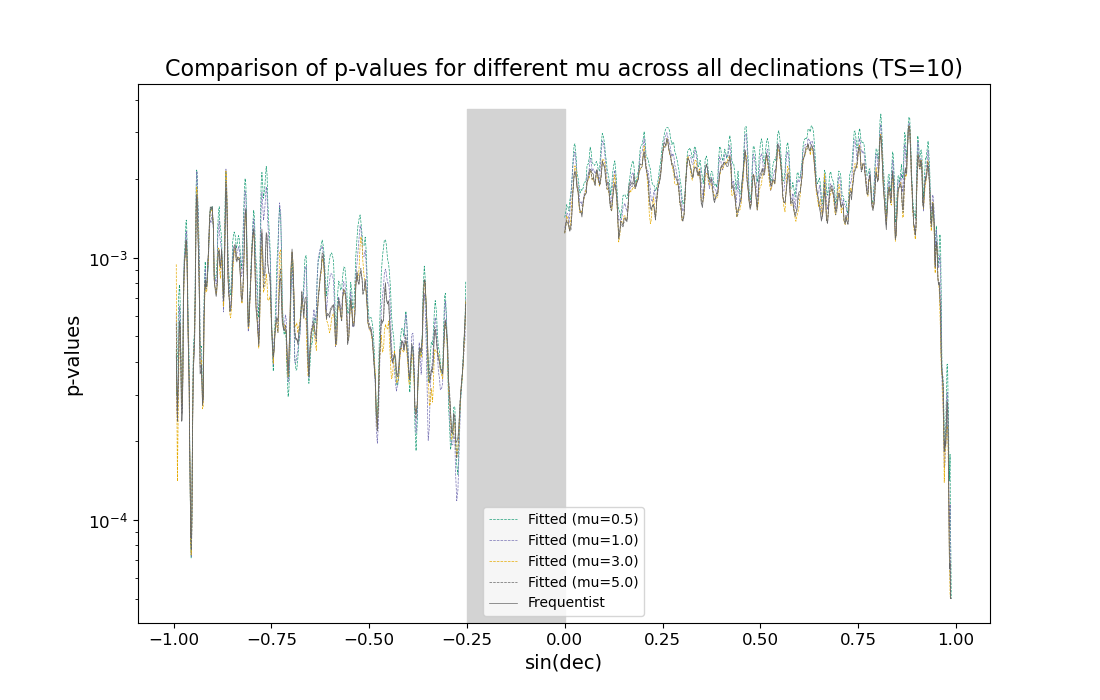

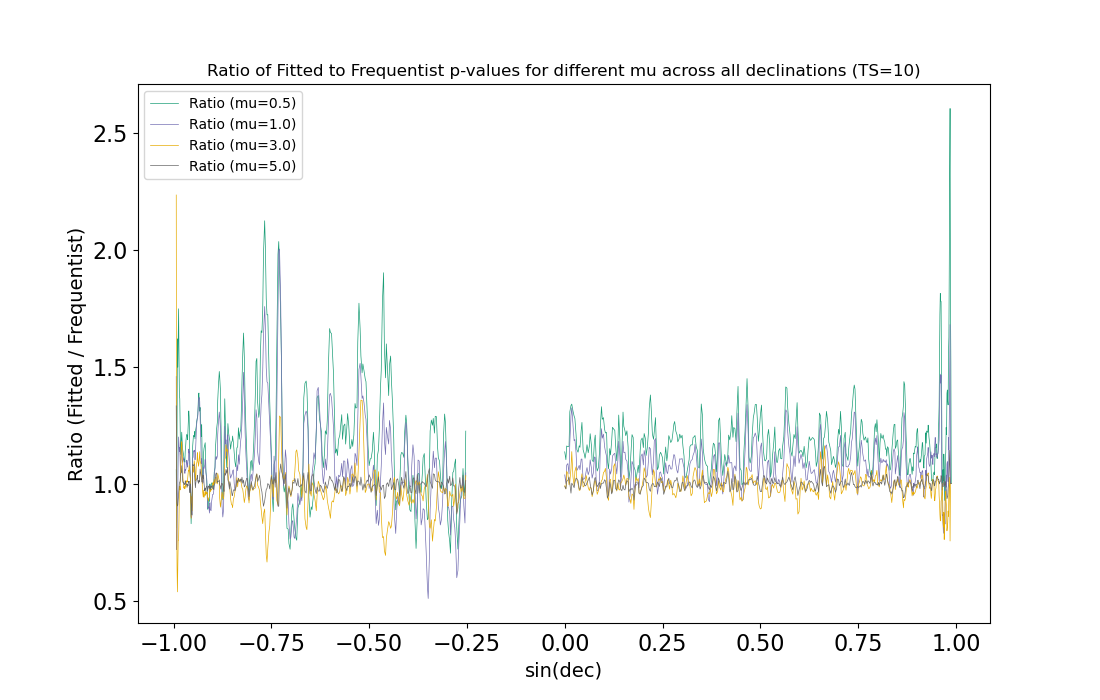

In [202]:
def process_files_sorted_by_sin_dec(folder_path):
    """Process files from lowest sin(Dec) to highest and plot p-values."""
    file_list = []

    for filename in os.listdir(folder_path):
        if filename.endswith('.npz'):
            match = re.search(r'histogram_(-?\d+\.\d+)_(-?\d+\.\d+)\.npz', filename)
            if match:
                sin_dec_start = float(match.group(1))
                file_list.append((sin_dec_start, filename))
            else:
                print(f"Filename {filename} does not match expected pattern.")

    file_list.sort()
    
    ts_values = np.array([10])  # A single TS value for the iteration (you can choose any)
    mu_values = np.array([0.5, 1, 3, 5])  # Example mu values to iterate over
    sin_dec_values = []
    
    frequentist_p_values_dict = {mu: [] for mu in mu_values}
    fitted_p_values_dict = {mu: [] for mu in mu_values}
    
    for sin_dec, filename in file_list:
        filepath = os.path.join(folder_path, filename)
        data = np.load(filepath)
        
        # Extract necessary data
        try:
            histogram_1d = data['hist']
            y_edges = data['bin_edges']
            centers = (y_edges[:-1] + y_edges[1:]) / 2
        except KeyError as e:
            print(f"Missing key in {filename}: {e}")
            continue
        
        # Calculate anti-cumulative distribution
        hy = 1 - np.cumsum(histogram_1d) / np.sum(histogram_1d)
        hx = centers
        
        sin_dec_values.append(sin_dec)  # Only append sin_dec once per file
        
        # Iterate over different values of mu
        for mu_cut in mu_values:
            # Fit gamma distribution
            norm_factor, popt = fit_gamma(hx, hy, mu_cut)
            
            # Calculate p-values for a fixed TS (since we only loop through mu now)
            frequentist_p_values, fitted_p_values = calculate_p_values(ts_values, hx, hy, mu_cut, norm_factor, popt)
            
            frequentist_p_values_dict[mu_cut].append(frequentist_p_values[ts_values[0]])
            fitted_p_values_dict[mu_cut].append(fitted_p_values[ts_values[0]])
    # Apply cutoff for p-values below 10^-5
    cutoff = 5e-5
    for mu in mu_values:
        frequentist_p_values_dict[mu] = [max(p, cutoff) for p in frequentist_p_values_dict[mu]]
        fitted_p_values_dict[mu] = [max(p, cutoff) for p in fitted_p_values_dict[mu]]
    
    # Remove sin(dec) values between -0.25 and 0 along with their corresponding p-values
    filtered_sin_dec_values = [sin_dec if not (-0.25 <= sin_dec < 0) else np.nan for sin_dec in sin_dec_values]
    
    for mu in mu_values:
        frequentist_p_values_dict[mu] = [p if not (-0.25 <= sin_dec < 0) else np.nan for sin_dec, p in zip(sin_dec_values, frequentist_p_values_dict[mu])]
        fitted_p_values_dict[mu] = [p if not (-0.25 <= sin_dec < 0) else np.nan for sin_dec, p in zip(sin_dec_values, fitted_p_values_dict[mu])]

    # Plotting the results
    fig, ax = plt.subplots(figsize=(11, 7))

    colors = plt.cm.Dark2(np.linspace(0, 1, len(mu_values)))  # Use a colormap for distinct colors
    
    for i, mu in enumerate(mu_values):
        freq_p_vals = frequentist_p_values_dict[mu]  # Already matched with sin_dec_values length
        fit_p_vals = fitted_p_values_dict[mu]  # Already matched with sin_dec_values length
        color = colors[i]
        # Plot fitted p-values with a dotted line
        ax.plot(filtered_sin_dec_values, fit_p_vals, '--', color=color, linewidth=0.5, label=f'Fitted (mu={mu})')
        # Plot frequentist p-values with a straight line
    ax.plot(filtered_sin_dec_values, freq_p_vals, '-', color=color, linewidth=0.5, label=f'Frequentist')

    # Fill between sin_dec values of -0.25 and 0 with grey color (no transparency)
    ax.fill_betweenx(
        y=[0, max(ax.get_ylim())],  # Use the full y-range
        x1=-0.25, x2=0,
        color='lightgrey'
    )    

    ax.set_yscale('log')
    ax.set_xlabel('sin(dec)', fontsize=14)
    ax.set_ylabel('p-values', fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.legend()
    ax.set_title(f'Comparison of p-values for different mu across all declinations (TS={ts_values[0]})', fontsize=16)
    plt.show()
    
    # Now create the ratio plot (fitted p-values / frequentist p-values)
    fig_ratio, ax_ratio = plt.subplots(figsize=(11, 7))

    for i, mu in enumerate(mu_values):
        freq_p_vals = frequentist_p_values_dict[mu]
        fit_p_vals = fitted_p_values_dict[mu]
        color = colors[i]
        
        # Calculate the ratio of fitted p-values to frequentist p-values
        ratio = np.array(fit_p_vals) / np.array(freq_p_vals)
        
        # Plot the ratio
        ax_ratio.plot(filtered_sin_dec_values, ratio, '-', color=color, linewidth=0.5, label=f'Ratio (mu={mu})')

    # Label and format the ratio plot
    ax_ratio.set_xlabel('sin(dec)', fontsize=14)
    ax_ratio.set_ylabel('Ratio (Fitted / Frequentist)', fontsize=14)
    ax_ratio.set_title(f'Ratio of Fitted to Frequentist p-values for different mu across all declinations (TS={ts_values[0]})')
    ax_ratio.legend()

    # Increase the size of the tick labels
    ax_ratio.tick_params(axis='both', which='major', labelsize=16)

    plt.show()


# Call the function with your specific path
folder_path = '/tmp/hsperfdata_kennedyc/ProjectImages/10y'
process_files_sorted_by_sin_dec(folder_path)

In [124]:
# # Function to process every 10th file or a specific file by sin(Dec)
# def process_every_10th_file_sorted_by_sin_dec(folder_path, mu_cut, ts_values, single_declination):
#     # List to store (sin_dec_start, filename) tuples
#     file_list = []
    
#     # Loop through each file in the folder and extract sin(Dec) values
#     for filename in os.listdir(folder_path):
#         if filename.endswith('.npz'):
#             match = re.search(r'histogram_(-?\d+\.\d+)_(-?\d+\.\d+)\.npz', filename)
#             if match:
#                 sin_dec_start = float(match.group(1))
#                 file_list.append((sin_dec_start, filename))
    
#     # Sort the files by sin(Dec) start value (ascending order)
#     file_list.sort()

#     # Process either every 10th file or only the file with the specified declination
#     sin_dec_values = []
#     frequentist_p_values_all = {ts: [] for ts in ts_values}
#     fitted_p_values_all = {ts: [] for ts in ts_values}
    
#     for i, (sin_dec_start, filename) in enumerate(file_list):
#         # If single_declination is provided, only process that file
#         if single_declination is not None:
#             if abs(sin_dec_start - single_declination) < 1e-6:  # Compare with a small tolerance
#                 # Process the file matching the single declination
#                 sin_dec_values.append(sin_dec_start)
#                 file_path = os.path.join(folder_path, filename)
#                 data = np.load(file_path)
#                 histogram_1d = data['hist']
#                 y_edges = data['bin_edges']
#                 hx = (y_edges[:-1] + y_edges[1:]) / 2  # Bin centers for hat_ts values
                
#                 # Process only if there are counts in the histogram
#                 if np.sum(histogram_1d) > 0:
#                     norm_factor, popt = fit_gamma(hx, histogram_1d, mu_cut)
#                     hy = compute_anti_cumulative(histogram_1d)

#                     # Interpolate p-values
#                     p_fit_interp = interpolate_p_from_fit(ts_values, hx, mu_cut, norm_factor, popt)
#                     p_data_interp = interpolate_p_from_data(ts_values, hx, hy)

#                     # Print p-values for frequentist and fitted for each TS value
#                     for idx, ts_value in enumerate(ts_values):
#                         frequentist_p_values_all[ts_value].append(p_data_interp[idx])
#                         fitted_p_values_all[ts_value].append(p_fit_interp[idx])
#                         print(single_declination)
#                         print(f"TS={ts_value}: Frequentist P-value = {p_data_interp[idx]:.4e}, Fitted P-value = {p_fit_interp[idx]:.4e}")
                        
#                 break  # Exit loop once the specific file is processed    

#         # If no specific declination is provided, process every 10th file 
#         elif i % 10 == 0:
#             sin_dec_values.append(sin_dec_start)
#             file_path = os.path.join(folder_path, filename)
#             data = np.load(file_path)
#             histogram_1d = data['hist']
#             y_edges = data['bin_edges']
#             hx = (y_edges[:-1] + y_edges[1:]) / 2

#             if np.sum(histogram_1d) > 0:
#                 norm_factor, popt = fit_gamma(hx, histogram_1d, mu_cut)
#                 hy = compute_anti_cumulative(histogram_1d)

#                 # Interpolate p-values
#                 p_fit_interp = interpolate_p_from_fit(ts_values, hx, mu_cut, norm_factor, popt)
#                 p_data_interp = interpolate_p_from_data(ts_values, hx, hy)

#                 for idx, ts_value in enumerate(ts_values):
#                     frequentist_p_values_all[ts_value].append(p_data_interp[idx])
#                     fitted_p_values_all[ts_value].append(p_fit_interp[idx])

#     # Plotting the results for each TS value
#     fig, ax = plt.subplots(figsize=(10, 6))
#     for ts_value in ts_values:
#         # Plot the frequentist p-values
#         ax.plot(sin_dec_values, frequentist_p_values_all[ts_value], label=f'Frequentist TS = {ts_value}', linestyle='--')

#         # Plot the fitted p-values
#         ax.plot(sin_dec_values, fitted_p_values_all[ts_value],  label=f'Fitted TS = {ts_value}', linestyle='-')

#     # Set log scale for y-axis
#     ax.set_yscale('log')

#     # Labels and title
#     ax.set_xlabel('sin(Declination)')
#     ax.set_ylabel('P Value')
#     ax.set_title('Frequentist vs Fitted P Values Across Multiple Declinations')

#     # Add legend
#     ax.legend()

#     # Save and show the plot
#     save_dir = '/tmp/hsperfdata_kennedyc/ProjectImages'
#     os.makedirs(save_dir, exist_ok=True)
#     filename = "PValues_vs_sindec_multiple.png"
#     filepath = os.path.join(save_dir, filename)
#     fig.savefig(filepath)
#     print(f"Plot saved as {filepath}")
#     plt.show()


# # Parameters
# folder_path = '/tmp/hsperfdata_kennedyc/ProjectImages/10y'
# mu_cut = 2  # Chosen mu_cut value
# ts_values = np.array([12.5])

# # Call the function for a specific declination (for debugging) or all (set single_declination to None)
# process_every_10th_file_sorted_by_sin_dec(folder_path, mu_cut, ts_values, single_declination=-0.307)



Optimal mu value: 2.602386673489743


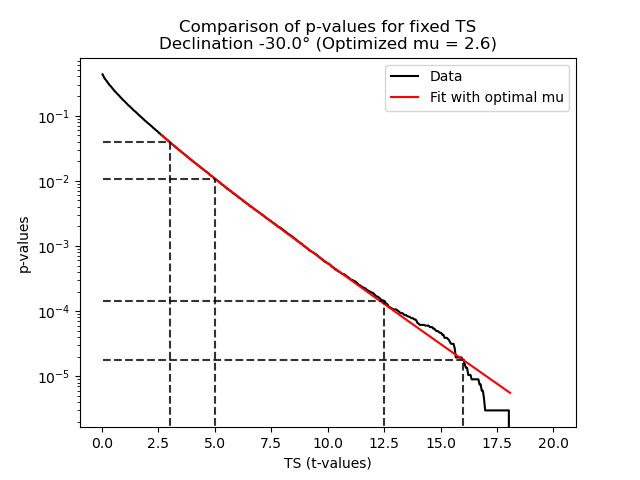

In [221]:
from scipy.optimize import differential_evolution
#Define the bounds for mu
mu_bounds = (0.01, 7)
#Define the objective function to minimize

def objective_function(mu):
    """
    Objective function to minimize: calculates the sum of squared differences
    between frequentist and fitted p-values for the given mu.

    Parameters:
    - mu: The mu value to optimize.
    
    Returns:
    - The sum of squared differences between frequentist and fitted p-values.
    """
    # Recompute the fitted p-values with the current mu
    norm_factor, popt = fit_gamma(hx, hy, mu_cut=mu)
    
    # Interpolated p-values from the fit with the new mu
    p_fit_interp = interpolate_p_from_fit(ts_values, hx, mu_cut=mu, norm_factor=norm_factor, popt=popt)
    
    # Debug print for shape mismatch
    
    # Ensure both arrays have the same length before calculating the difference
    min_len = min(len(p_fit_interp), len(p_data_interp))
    p_fit_interp = p_fit_interp[:min_len]
    p_data_interp_aligned = p_data_interp[:min_len]
    
    # Calculate the sum of squared differences between frequentist and fitted p-values
    sum_squared_diff = np.sum((p_fit_interp - p_data_interp_aligned)**2)
    return sum_squared_diff
#Use differential evolution to find the optimal value of mu

result = differential_evolution(objective_function, bounds=[mu_bounds])
#The optimal value of mu that minimizes the difference

optimal_mu = result.x[0]
print(f"Optimal mu value: {optimal_mu}")
#Now refit using the optimal mu and plot

norm_factor, popt = fit_gamma(hx, hy, mu_cut=optimal_mu)
#Interpolated p-values from the fit with the optimal mu

p_fit_interp_optimal = interpolate_p_from_fit(ts_values, hx, mu_cut=optimal_mu, norm_factor=norm_factor, popt=popt)
#Plotting the results with optimal mu

fig, ax = plt.subplots()
ax.plot(hx, hy, 'k-', label='Data')
ax.plot(hx[hx > optimal_mu], norm_factor * scipy.stats.gamma.pdf(hx[hx > optimal_mu], *popt), 'r-', label='Fit with optimal mu')
#Plot vertical and horizontal lines for each TS value

for idx, ts_value in enumerate(ts_values):
    if idx < len(p_data_interp):  # Ensure the index is within bounds
    # Data (frequentist) p-value
        y_frequentist = p_data_interp[idx]
        
        # Plot vertical and horizontal lines for the data (frequentist) p-value
        ax.plot([ts_value, ts_value], [0, y_frequentist], color='black', linestyle='--', alpha=0.8)
        ax.plot([hx[0], ts_value], [y_frequentist, y_frequentist], color='black', linestyle='--', alpha=0.8)

if idx < len(p_fit_interp_optimal):  # Ensure the index is within bounds for fitted p-values
    # Fitted p-value with optimal mu
        y_fitted_optimal = p_fit_interp_optimal[idx]
        
        # Plot vertical and horizontal lines for the fit p-value with optimal mu
        ax.plot([ts_value, ts_value], [0, y_fitted_optimal], color='red', linestyle=':', alpha=0.8)
        ax.plot([hx[0], ts_value], [y_fitted_optimal, y_fitted_optimal], color='red', linestyle=':', alpha=0.8)
#Set log scale for y-axis
# Convert sindec to declination in degrees

sindec = declination
declination_radians = np.arcsin(sindec)
declination_degrees = np.degrees(declination_radians)
ax.set_yscale('log')
#Labels and title

ax.set_xlabel('TS (t-values)')
ax.set_ylabel('p-values')
#Add title with declination and comparison text

ax.set_title(f'Comparison of p-values for fixed TS\nDeclination {declination_degrees:.1f}\u00B0 (Optimized mu = {optimal_mu:.3g})')
ax.legend()

plt.show()

Optimal mu value: 2.6178717103196347


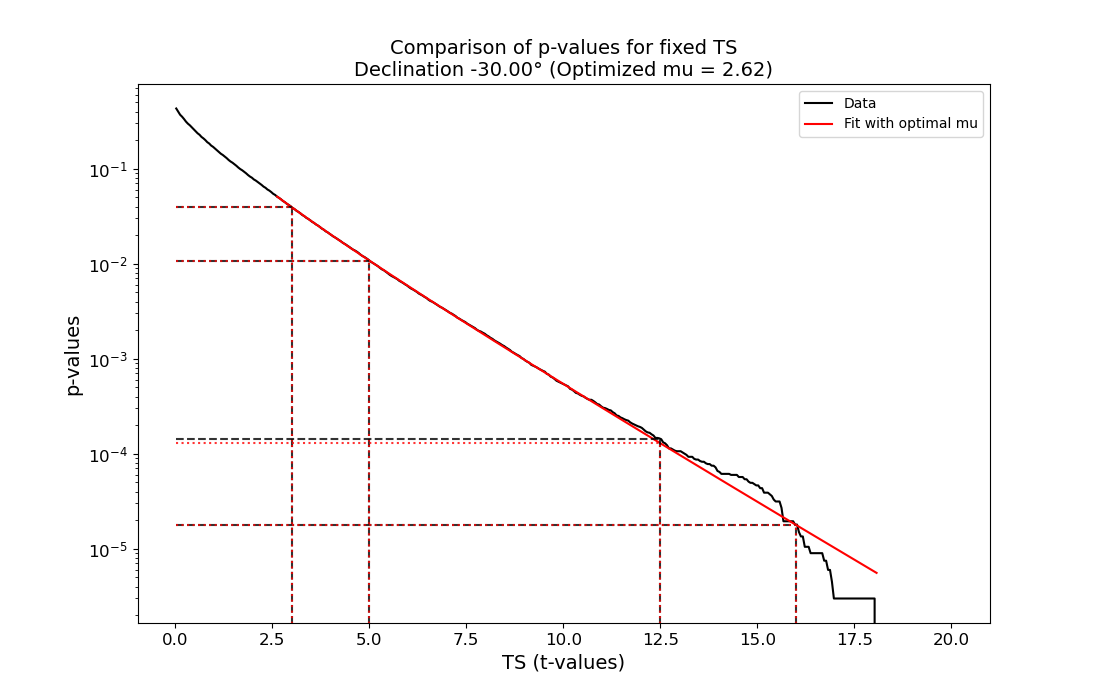

In [235]:
## WORKING
from scipy.optimize import differential_evolution
# Define the bounds for mu
mu_bounds = (0.01, 4)
# Define the objective function to minimize
def objective_function(mu):
    """
    Objective function to minimize: calculates the sum of squared differences
    between frequentist and fitted p-values for the given mu.
    
    Parameters:
    - mu: The mu value to optimize.
    
    Returns:
    - The sum of squared differences between frequentist and fitted p-values.
    """
    # Recompute the fitted p-values with the current mu
    norm_factor, popt = fit_gamma(hx, hy, mu_cut=mu)

    # Interpolated p-values from the fit with the new mu
    p_fit_interp = interpolate_p_from_fit(ts_values, hx, mu_cut=mu, norm_factor=norm_factor, popt=popt)
    
    # Debug print for shape mismatch
    
    # Ensure both arrays have the same length before calculating the difference
    min_len = min(len(p_fit_interp), len(p_data_interp))
    p_fit_interp = p_fit_interp[:min_len]
    p_data_interp_aligned = p_data_interp[:min_len]
    
    # Calculate the sum of squared differences between frequentist and fitted p-values
    sum_squared_diff = np.sum((p_fit_interp - p_data_interp_aligned)**2)
    
    return sum_squared_diff

# Use differential evolution to find the optimal value of mu
result = differential_evolution(objective_function, bounds=[mu_bounds])

# The optimal value of mu that minimizes the difference
optimal_mu = result.x[0]
print(f"Optimal mu value: {optimal_mu}")

# Now refit using the optimal mu and plot
norm_factor, popt = fit_gamma(hx, hy, mu_cut=optimal_mu)

# Interpolated p-values from the fit with the optimal mu
p_fit_interp_optimal = interpolate_p_from_fit(ts_values, hx, mu_cut=optimal_mu, norm_factor=norm_factor, popt=popt)

# Plotting the results with optimal mu
fig, ax = plt.subplots(figsize = (11, 7))
ax.plot(hx, hy, 'k-', label='Data')
ax.plot(hx[hx > optimal_mu], norm_factor * scipy.stats.gamma.pdf(hx[hx > optimal_mu], *popt), 'r-', label='Fit with optimal mu')

# Plot vertical and horizontal lines for each TS value
for idx, ts_value in enumerate(ts_values):
    if idx < len(p_data_interp):  # Ensure the index is within bounds
        # Data (frequentist) p-value
        y_frequentist = p_data_interp[idx]
        
        # Plot vertical and horizontal lines for the data (frequentist) p-value
        ax.plot([ts_value, ts_value], [0, y_frequentist], color='black', linestyle='--', alpha=0.8)
        ax.plot([hx[0], ts_value], [y_frequentist, y_frequentist], color='black', linestyle='--', alpha=0.8)
    
    if idx < len(p_fit_interp_optimal):  # Ensure the index is within bounds for fitted p-values
        # Fitted p-value with optimal mu
        y_fitted_optimal = p_fit_interp_optimal[idx]
        
        # Plot vertical and horizontal lines for the fit p-value with optimal mu
        ax.plot([ts_value, ts_value], [0, y_fitted_optimal], color='red', linestyle=':', alpha=0.8)
        ax.plot([hx[0], ts_value], [y_fitted_optimal, y_fitted_optimal], color='red', linestyle=':', alpha=0.8)

# Set log scale for y-axis
ax.set_yscale('log')

# Set axis labels and title with specified font sizes
ax.set_xlabel('TS (t-values)', fontsize=14)
ax.set_ylabel('p-values', fontsize=14)

# Add title with declination and comparison text
ax.set_title(f'Comparison of p-values for fixed TS\nDeclination {declination_degrees:.2f}\u00B0 (Optimized mu = {optimal_mu:.3g})', fontsize=14)

# Increase tick marks size
ax.tick_params(axis='both', which='major', labelsize=12)
ax.legend()

plt.show()



Processing declination sin(dec) = -0.5


NameError: name 'file_list' is not defined

Optimization result:              message: Optimization terminated successfully.
             success: True
                 fun: 2.8685549227919347e-09
                   x: [ 2.741e+00]
                 nit: 10
                nfev: 167
          population: [[ 2.741e+00]
                       [ 2.738e+00]
                       ...
                       [ 2.738e+00]
                       [ 2.747e+00]]
 population_energies: [ 2.869e-09  2.869e-09 ...  2.869e-09  2.869e-09]
Plot saved as /tmp/hsperfdata_kennedyc/ProjectImages/GammaFit_Declination_-0.307.png


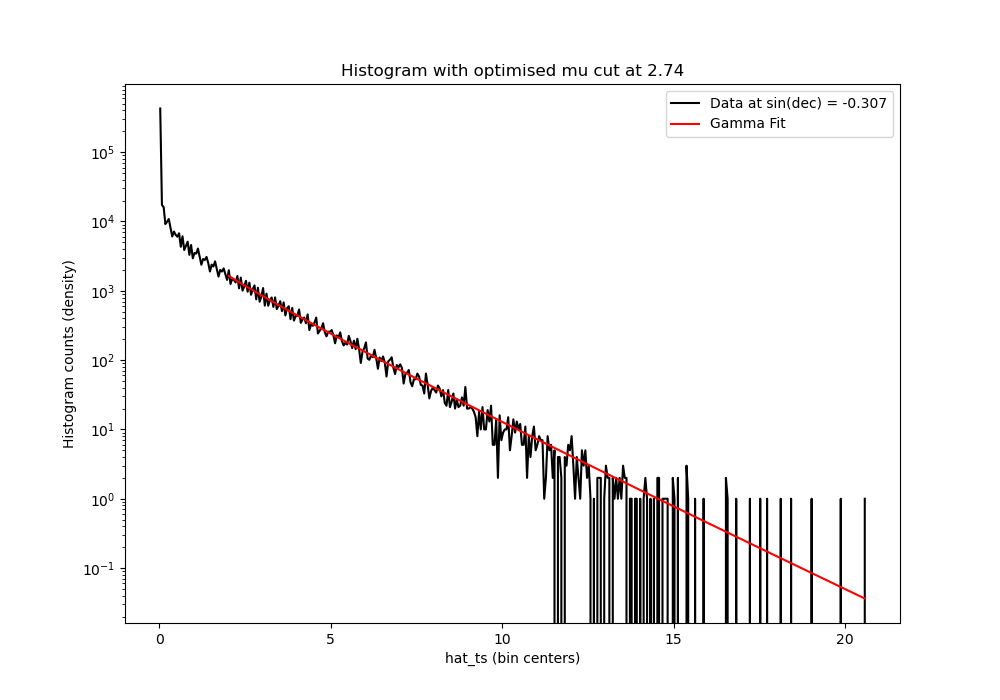

In [116]:
# Print the result of the optimization
print(f"Optimization result: {result}")
# Define the gamma distribution function
def gamma_dist(x, a, b, loc=0.0):
    return scipy.stats.gamma.pdf(x, a, scale=1/b, loc=loc)

# Define the function to fit the gamma distribution
def fit_gamma(x, y, mu_cut):
    x_fit = x[x > mu_cut]
    y_fit = y[x > mu_cut]
    norm_factor = np.sum(y_fit)
    hy_fit_norm = y_fit / norm_factor
    popt, pcov = curve_fit(gamma_dist, x_fit, hy_fit_norm, p0=[1.0, 0.5, 0.0], maxfev=50000)
    return norm_factor, popt

# Fit the gamma distribution to the 1D histogram data
mu_cut = 2  # Set the cutoff
norm_factor, popt = fit_gamma(hx, histogram_1d, mu_cut)
declination = x_edges

# Plotting the results
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(hx, histogram_1d, 'k-', label=f'Data at sin(dec) = {x_edges}')
ax.plot(hx[hx > mu_cut], norm_factor * gamma_dist(hx[hx > mu_cut], *popt), 'r-', label='Gamma Fit')
ax.set_yscale('log')
ax.set_xlabel('hat_ts (bin centers)')
ax.set_ylabel('Histogram counts (density)')
ax.legend()
ax.set_title(f'Histogram with optimised mu cut at {optimal_mu:.3g}')
# Save the plot
save_dir = '/tmp/hsperfdata_kennedyc/ProjectImages'
os.makedirs(save_dir, exist_ok=True)
filename = f"GammaFit_Declination_{x_edges}.png"
filepath = os.path.join(save_dir, filename)
fig.savefig(filepath)
print(f"Plot saved as {filepath}")

plt.show()

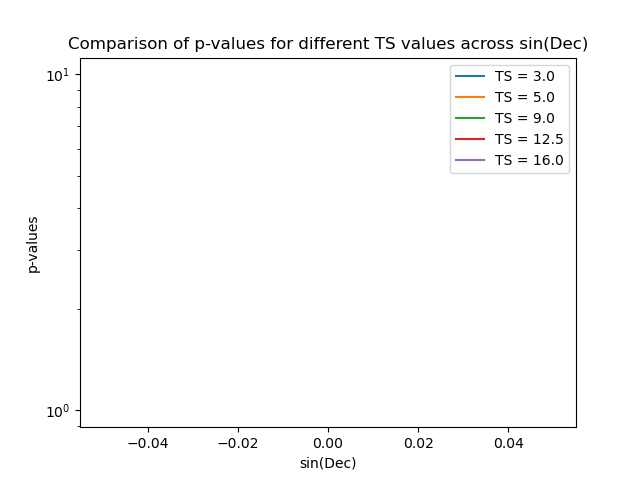

         309614 function calls (293320 primitive calls) in 0.232 seconds

   Ordered by: internal time
   List reduced from 1619 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
10431/173    0.012    0.000    0.029    0.000 /home/kennedyc/miniforge3/envs/jupenv/lib/python3.10/copy.py:128(deepcopy)
        1    0.011    0.011    0.011    0.011 {method 'encode' of 'ImagingEncoder' objects}
       53    0.006    0.000    0.006    0.000 {method 'set_text' of 'matplotlib.ft2font.FT2Font' objects}
      782    0.005    0.000    0.023    0.000 /home/kennedyc/miniforge3/envs/jupenv/lib/python3.10/site-packages/matplotlib/artist.py:1173(_update_props)
      196    0.004    0.000    0.030    0.000 /home/kennedyc/miniforge3/envs/jupenv/lib/python3.10/site-packages/matplotlib/lines.py:287(__init__)
10820/10630    0.004    0.000    0.007    0.000 {built-in method builtins.getattr}
     1307    0.003    0.000    0.016    0.000 /home/kennedyc/mini

In [164]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution
import cProfile
import pstats
from pstats import SortKey


# Assuming fit_gamma and interpolate_p_from_fit are defined elsewhere
# from your_module import fit_gamma, interpolate_p_from_fit

def process_files_sorted_by_sin_dec(folder_path):
    """
    Process .npz files from the specified folder, optimize mu for each, and plot
    the comparison of p-values for different test statistics (TS) across sin(Dec).
    
    Parameters:
    - folder_path: Directory containing the .npz files.
    """
    file_list = []

    # Retrieve .npz files and extract sin(Dec) start values for sorting
    for filename in os.listdir(folder_path):
        if filename.endswith('.npz'):
            match = re.search(r'histogram_(-?\d+\.\d+)_(-?\d+\.\d+)\.npz', filename)
            if match:
                sin_dec_start = float(match.group(1))
                file_list.append((sin_dec_start, filename))

    # Sort files by sin(Dec)
    file_list.sort()

    # Define TS values and initialize structures for storing results
    ts_values = np.array([3, 5, 9, 12.5, 16])  # Example TS values
    sin_dec_values = []
    p_values_dict = {ts: [] for ts in ts_values}

    # Iterate over the sorted files
    for sin_dec_start, filename in file_list:
        # Load .npz file data (adjust key names based on actual content)
        data = np.load(os.path.join(folder_path, filename))

        # Adapt to the new key names ('hist' and 'bin_edges')
        if 'hist' in data and 'bin_edges' in data:
            hx = data['bin_edges']  # Adjust key name based on your files
            hy = data['hist']       # Adjust key name based on your files
        else:
            continue  # Skip if keys are missing

        # Check if the shapes of hx and hy match (to avoid dimension mismatch)
        if len(hx) != len(hy):
            print(f"Shape mismatch in file {filename}: hx and hy must have the same length.")
            continue

        # Optimize mu for the current file
        optimal_mu = optimize_mu(hx, hy, ts_values)
        print(f"Optimized mu: {optimal_mu:.3f} for sin(dec) = {sin_dec_start:.3f}")

        # Refit with the optimal mu and interpolate p-values
        norm_factor, popt = fit_gamma(hx, hy, mu_cut=optimal_mu)
        p_fit_interp = interpolate_p_from_fit(ts_values, hx, mu_cut=optimal_mu, norm_factor=norm_factor, popt=popt)

        # Only append the sin(dec) value if p-values were successfully computed
        sin_dec_values.append(sin_dec_start)

        # Store the interpolated p-values for each TS
        for i, ts in enumerate(ts_values):
            if i < len(p_fit_interp):
                p_values_dict[ts].append(p_fit_interp[i])

    # After processing all files, generate the final plot
    plot_p_values(sin_dec_values, p_values_dict, ts_values)


def optimize_mu(hx, hy, ts_values):
    """
    Optimizes the value of 'mu' by minimizing the difference between the
    frequentist and fitted p-values.
    
    Parameters:
    - hx: Histogram bin values.
    - hy: Corresponding y-values.
    - ts_values: Test statistic values.
    
    Returns:
    - optimal_mu: The optimized 'mu' value.
    """
    def objective_function(mu):
        norm_factor, popt = fit_gamma(hx, hy, mu_cut=mu)
        p_fit_interp = interpolate_p_from_fit(ts_values, hx, mu_cut=mu, norm_factor=norm_factor, popt=popt)

        # Ensure both arrays have the same length
        min_len = min(len(p_fit_interp), len(p_data_interp))
        p_fit_interp = p_fit_interp[:min_len]
        p_data_interp_aligned = p_data_interp[:min_len]

        # Sum of squared differences
        sum_squared_diff = np.sum((p_fit_interp - p_data_interp_aligned) ** 2)
        return sum_squared_diff

    # Perform optimization using differential evolution
    result = differential_evolution(objective_function, bounds=[(0.01, 7)])
    return result.x[0]


def plot_p_values(sin_dec_values, p_values_dict, ts_values):
    """
    Plots the optimized p-values for each TS value as a function of sin(Dec).
    
    Parameters:
    - sin_dec_values: List of sin(Dec) values.
    - p_values_dict: Dictionary of p-values for each TS value.
    - ts_values: List of test statistic (TS) values.
    """
    fig, ax = plt.subplots()

    # Plot p-values for each TS
    for ts in ts_values:
        if ts in p_values_dict and len(p_values_dict[ts]) == len(sin_dec_values):  # Ensure lengths match
            ax.plot(sin_dec_values, p_values_dict[ts], label=f'TS = {ts}')

    # Set log scale for y-axis
    ax.set_yscale('log')

    # Labels and title
    ax.set_xlabel('sin(Dec)')
    ax.set_ylabel('p-values')
    ax.set_title('Comparison of p-values for different TS values across sin(Dec)')

    # Legend
    ax.legend()

    # Show the plot
    plt.show()


def main():
    # Path to the folder containing the .npz files
    folder_path = "/tmp/hsperfdata_kennedyc/ProjectImages"
    process_files_sorted_by_sin_dec(folder_path)


if __name__ == "__main__":
    try:
        profiler = cProfile.Profile()
        profiler.enable()  # Enable the profiler

        main()  # Execute your main logic

        profiler.disable()  # Disable profiler
        # Output profiling stats
        stats = pstats.Stats(profiler).sort_stats(SortKey.TIME)
        stats.print_stats(10)
    except RuntimeError as e:
        print(f"Profiler RuntimeError: {e}")
    finally:
        profiler.disable()  # Ensure profiler is disabled properly





In [ ]:
single_dec = -0.307 

In [104]:
# import os
# import re

# # Function to process files from lowest sin(Dec) to highest
# def process_files_sorted_by_sin_dec(folder_path):
#     # List to store (sin_dec_start, filename) tuples
#     file_list = []

#     # Loop through each file in the folder and extract sin(Dec) values
#     for filename in os.listdir(folder_path):
#         if filename.endswith('.npz'):
#             match = re.search(r'histogram_(-?\d+\.\d+)_(-?\d+\.\d+)\.npz', filename)
#             if match:
#                 sin_dec_start = float(match.group(1))
#                 file_list.append((sin_dec_start, filename))
#             else:
#                 print(f"Filename {filename} does not match expected pattern.")

#     # Sort the files by sin(Dec) start value (ascending order)
#     file_list.sort()

#     # # Process files in sorted order
#     # for sin_dec_start, filename in file_list:
#     #     print(f"Processing file: {filename}")
#     #     print(f"sin(Dec) start: {sin_dec_start}")
#     #     # Add your file processing logic here, such as loading and processing the data

# # Call the function with your specific path
# folder_path = '/tmp/hsperfdata_kennedyc/ProjectImages/10y'
# process_files_sorted_by_sin_dec(folder_path)

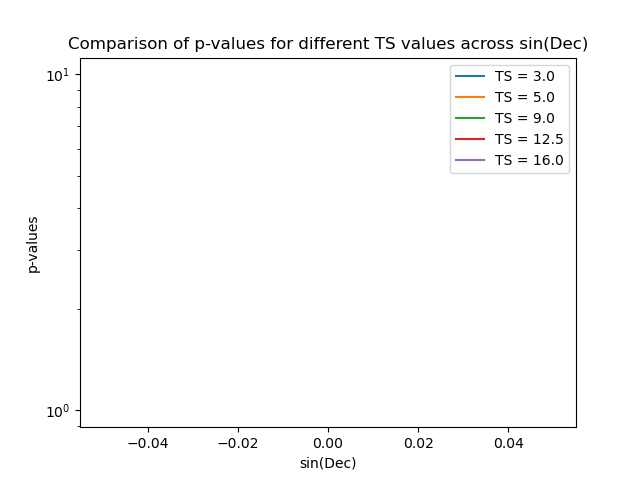

         310174 function calls (293492 primitive calls) in 0.221 seconds

   Ordered by: internal time
   List reduced from 1626 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
10431/173    0.012    0.000    0.027    0.000 /home/kennedyc/miniforge3/envs/jupenv/lib/python3.10/copy.py:128(deepcopy)
        1    0.011    0.011    0.011    0.011 {method 'encode' of 'ImagingEncoder' objects}
       53    0.006    0.000    0.006    0.000 {method 'set_text' of 'matplotlib.ft2font.FT2Font' objects}
      782    0.005    0.000    0.022    0.000 /home/kennedyc/miniforge3/envs/jupenv/lib/python3.10/site-packages/matplotlib/artist.py:1173(_update_props)
      196    0.004    0.000    0.027    0.000 /home/kennedyc/miniforge3/envs/jupenv/lib/python3.10/site-packages/matplotlib/lines.py:287(__init__)
10820/10630    0.004    0.000    0.006    0.000 {built-in method builtins.getattr}
11976/10874    0.003    0.000    0.004    0.000 /home/kennedyc/mi

In [183]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution
import time
import cProfile
import pstats
from pstats import SortKey

def process_files_sorted_by_sin_dec(folder_path, skip=10):
    """
    Process .npz files from the specified folder, optimize mu for each, and plot
    the comparison of p-values for different test statistics (TS) across sin(Dec).
    
    Parameters:
    - folder_path: Directory containing the .npz files.
    - skip: Load one in every 'skip' files to speed up the processing.
    """
    file_list = []

    # Retrieve .npz files and extract sin(Dec) start values for sorting
    for filename in os.listdir(folder_path):
        if filename.endswith('.npz'):
            match = re.search(r'histogram_(-?\d+\.\d+)_(-?\d+\.\d+)\.npz', filename)
            if match:
                sin_dec_start = float(match.group(1))
                file_list.append((sin_dec_start, filename))

    # Sort files by sin(Dec)
    file_list.sort()

    # Process only one file out of every 'skip' files
    file_list = file_list[::skip]  # Skips files to speed up the process

    # Define TS values and initialize structures for storing results
    ts_values = np.array([3, 5, 9, 12.5, 16])  # Example TS values
    sin_dec_values = []
    p_values_dict = {ts: [] for ts in ts_values}

    # Iterate over the sorted and filtered files
    for sin_dec_start, filename in file_list:
        start_time = time.time()  # Start timing the processing of each file

        print(f"Processing file: {filename} with sin(Dec) = {sin_dec_start}")
        filepath = os.path.join(folder_path, filename)
        
        try:
            # Load .npz file data (adjust key names based on actual content)
            data = np.load(filepath)
        except Exception as e:
            print(f"Failed to load {filename}: {e}")
            continue

        # Check if the required keys are present
        if 'hist' in data and 'bin_edges' in data:
            hx = data['bin_edges']  # These are the bin edges
            hy = data['hist']       # These are the bin counts
        else:
            print(f"Missing 'hist' or 'bin_edges' in {filename}")
            continue  # Skip if keys are missing

        # hx should have one more element than hy (because hx represents edges)
        if len(hx) != len(hy) + 1:
            print(f"Shape mismatch in file {filename}: hx (bin edges) should have one more element than hy (histogram counts).")
            continue

        # Calculate the bin centers (midpoints of bin edges)
        hx_centers = (hx[:-1] + hx[1:]) / 2

        # Optimize mu for the current file
        try:
            optimal_mu = optimize_mu(hx_centers, hy, ts_values)
            print(f"Optimized mu: {optimal_mu:.3f} for sin(dec) = {sin_dec_start:.3f}")
        except Exception as e:
            print(f"Failed to optimize mu for {filename}: {e}")
            continue
        
        # Refit with the optimal mu and interpolate p-values
        try:
            norm_factor, popt = fit_gamma(hx_centers, hy, mu_cut=optimal_mu)
            p_fit_interp = interpolate_p_from_fit(ts_values, hx_centers, mu_cut=optimal_mu, norm_factor=norm_factor, popt=popt)
        except Exception as e:
            print(f"Failed to fit gamma or interpolate p-values for {filename}: {e}")
            continue

        # Only append the sin(dec) value if p-values were successfully computed
        sin_dec_values.append(sin_dec_start)

        # Store the interpolated p-values for each TS
        for i, ts in enumerate(ts_values):
            if i < len(p_fit_interp):
                p_values_dict[ts].append(p_fit_interp[i])

        # Calculate and print the time taken to process the current file
        end_time = time.time()
        elapsed_time = end_time - start_time
        print(f"Processing time for sin(dec) = {sin_dec_start:.3f}: {elapsed_time:.2f} seconds")

    # After processing all files, generate the final plot
    plot_p_values(sin_dec_values, p_values_dict, ts_values)


def optimize_mu(hx, hy, ts_values):
    """
    Optimizes the value of 'mu' by minimizing the difference between the
    frequentist and fitted p-values.
    
    Parameters:
    - hx: Histogram bin values.
    - hy: Corresponding y-values.
    - ts_values: Test statistic values.
    
    Returns:
    - optimal_mu: The optimized 'mu' value.
    """
    def objective_function(mu):
        norm_factor, popt = fit_gamma(hx, hy, mu_cut=mu)
        p_fit_interp = interpolate_p_from_fit(ts_values, hx, mu_cut=mu, norm_factor=norm_factor, popt=popt)

        # Ensure both arrays have the same length
        min_len = min(len(p_fit_interp), len(p_data_interp))
        p_fit_interp = p_fit_interp[:min_len]
        p_data_interp_aligned = p_data_interp[:min_len]

        # Sum of squared differences
        sum_squared_diff = np.sum((p_fit_interp - p_data_interp_aligned) ** 2)
        return sum_squared_diff

    # Perform optimization using differential evolution
    result = differential_evolution(objective_function, bounds=[(0.01, 7)])
    return result.x[0]


def plot_p_values(sin_dec_values, p_values_dict, ts_values):
    """
    Plots the optimized p-values for each TS value as a function of sin(Dec).
    
    Parameters:
    - sin_dec_values: List of sin(Dec) values.
    - p_values_dict: Dictionary of p-values for each TS value.
    - ts_values: List of test statistic (TS) values.
    """
    fig, ax = plt.subplots()

    # Plot p-values for each TS
    for ts in ts_values:
        if ts in p_values_dict and len(p_values_dict[ts]) == len(sin_dec_values):  # Ensure lengths match
            ax.plot(sin_dec_values, p_values_dict[ts], label=f'TS = {ts}')

    # Set log scale for y-axis
    ax.set_yscale('log')

    # Labels and title
    ax.set_xlabel('sin(Dec)')
    ax.set_ylabel('p-values')
    ax.set_title('Comparison of p-values for different TS values across sin(Dec)')

    # Legend
    ax.legend()

    # Show the plot
    plt.show()


def main():
    # Path to the folder containing the .npz files
    folder_path = "/tmp/hsperfdata_kennedyc/ProjectImages"
    
    # Call the processing function with a skip factor of 10 (i.e., process 1 in every 10 files)
    process_files_sorted_by_sin_dec(folder_path, skip=10)


if __name__ == "__main__":
    try:
        profiler = cProfile.Profile()
        profiler.enable()  # Enable the profiler

        main()  # Execute your main logic

        profiler.disable()  # Disable profiler
        # Output profiling stats
        stats = pstats.Stats(profiler).sort_stats(SortKey.TIME)
        stats.print_stats(10)
    except RuntimeError as e:
        print(f"Profiler RuntimeError: {e}")
    finally:
        profiler.disable()  # Ensure profiler is disabled properly

In [26]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution
import scipy.stats
import cProfile
import pstats
from pstats import SortKey


def process_files_sorted_by_sin_dec(folder_path):
    """
    Process .npz files from the specified folder, optimize mu for each, and plot
    the comparison of p-values for different test statistics (TS) across sin(Dec).
    
    Parameters:
    - folder_path: Directory containing the .npz files.
    """
    file_list = []

    # Retrieve .npz files and extract sin(Dec) start values for sorting
    for filename in os.listdir(folder_path):
        if filename.endswith('.npz'):
            match = re.search(r'histogram_(-?\d+\.\d+)_(-?\d+\.\d+)\.npz', filename)
            if match:
                sin_dec_start = float(match.group(1))
                file_list.append((sin_dec_start, filename))

    # Sort files by sin(Dec)
    file_list.sort()

    # Define TS values and initialize structures for storing results
    ts_values = np.array([3, 5, 9, 12.5, 16])  # Example TS values
    sin_dec_values = []
    p_values_dict = {ts: [] for ts in ts_values}

    # Iterate over the sorted files
    for sin_dec_start, filename in file_list:
        # Load .npz file data (adjust key names based on actual content)
        data = np.load(os.path.join(folder_path, filename))

        # Check if the required keys are present
        if 'hist' in data and 'bin_edges' in data:
            hx = data['bin_edges']  # These are the bin edges
            hy = data['hist']       # These are the bin counts
        else:
            print(f"Missing 'hist' or 'bin_edges' in {filename}")
            continue  # Skip if keys are missing

        # hx should have one more element than hy (because hx represents edges)
        if len(hx) != len(hy) + 1:
            print(f"Shape mismatch in file {filename}: hx (bin edges) should have one more element than hy (histogram counts).")
            continue

        # Calculate the bin centers (midpoints of bin edges)
        hx_centers = (hx[:-1] + hx[1:]) / 2

        # Optimize mu for the current file
        try:
            optimal_mu = optimize_mu(hx_centers, hy, ts_values)
            print(f"Optimized mu: {optimal_mu:.3f} for sin(dec) = {sin_dec_start:.3f}")
        except Exception as e:
            print(f"Failed to optimize mu for {filename}: {e}")
            continue
        
        # Refit with the optimal mu and interpolate p-values
        try:
            norm_factor, popt = fit_gamma(hx_centers, hy, mu_cut=optimal_mu)
            p_fit_interp = interpolate_p_from_fit(ts_values, hx_centers, mu_cut=optimal_mu, norm_factor=norm_factor, popt=popt)
        except Exception as e:
            print(f"Failed to fit gamma or interpolate p-values for {filename}: {e}")
            continue

        # Only append the sin(dec) value if p-values were successfully computed
        sin_dec_values.append(sin_dec_start)

        # Store the interpolated p-values for each TS
        for i, ts in enumerate(ts_values):
            if i < len(p_fit_interp):
                p_values_dict[ts].append(p_fit_interp[i])

    # After processing all files, generate the final plot
    plot_p_values(sin_dec_values, p_values_dict, ts_values)

def optimize_mu(hx, hy, ts_values):
    """
    Optimizes the value of 'mu' by minimizing the difference between the
    frequentist and fitted p-values.
    
    Parameters:
    - hx: Histogram bin values.
    - hy: Corresponding y-values.
    - ts_values: Test statistic values.
    
    Returns:
    - optimal_mu: The optimized 'mu' value.
    """
    def objective_function(mu):
        norm_factor, popt = fit_gamma(hx, hy, mu_cut=mu)
        p_fit_interp = interpolate_p_from_fit(ts_values, hx, mu_cut=mu, norm_factor=norm_factor, popt=popt)

        # p_data_interp needs to be initialized or provided externally
        min_len = min(len(p_fit_interp), len(p_data_interp))
        p_fit_interp = p_fit_interp[:min_len]
        p_data_interp_aligned = p_data_interp[:min_len]

        # Sum of squared differences
        sum_squared_diff = np.sum((p_fit_interp - p_data_interp_aligned) ** 2)
        return sum_squared_diff

    # Perform optimization using differential evolution
    result = differential_evolution(objective_function, bounds=[(0.01, 7)])
    return result.x[0]

def plot_p_values(sin_dec_values, p_values_dict, ts_values):
    """
    Plots the optimized p-values for each TS value as a function of sin(Dec).
    
    Parameters:
    - sin_dec_values: List of sin(Dec) values.
    - p_values_dict: Dictionary of p-values for each TS value.
    - ts_values: List of test statistic (TS) values.
    """
    fig, ax = plt.subplots()

    # Plot p-values for each TS
    for ts in ts_values:
        if ts in p_values_dict and len(p_values_dict[ts]) == len(sin_dec_values):  # Ensure lengths match
            ax.plot(sin_dec_values, p_values_dict[ts], label=f'TS = {ts}')

    # Set log scale for y-axis
    ax.set_yscale('log')

    # Labels and title
    ax.set_xlabel('sin(Dec)')
    ax.set_ylabel('p-values')
    ax.set_title('Comparison of p-values for different TS values across sin(Dec)')

    # Legend
    ax.legend()

    # Show the plot
    plt.show()

def main():
    # Path to the folder containing the .npz files
    folder_path = "/tmp/hsperfdata_kennedyc/ProjectImages/10y"
    process_files_sorted_by_sin_dec(folder_path)

if __name__ == "__main__":
    try:
        profiler = cProfile.Profile()
        profiler.enable()  # Enable the profiler

        main()  # Execute your main logic

        profiler.disable()  # Disable profiler
        # Output profiling stats
        stats = pstats.Stats(profiler).sort_stats(SortKey.TIME)
        stats.print_stats(10)
    except RuntimeError as e:
        print(f"Profiler RuntimeError: {e}")
    finally:
        profiler.disable()  # Ensure profiler is disabled properly

Optimized mu: 6.231 for sin(dec) = -0.993


KeyboardInterrupt: 

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.optimize import curve_fit
# from scipy.stats import gamma as gamma_dist_scipy
# import os
# import re
# from scipy.interpolate import interp1d

# # Function to load and process a single file
# def process_file(filename, folder_path):
#     # Extract x_edges (declination) from the filename using regex
#     x_edges = float(re.search(r'histogram_(-?\d+\.\d+)_(-?\d+\.\d+)\.npz', filename).group(1))
#     declination = x_edges

#     # Load the 2D histogram and y_edges from the .npz file
#     file_path = os.path.join(folder_path, filename)
#     data = np.load(file_path)
#     histogram_1d = data['hist']
#     y_edges = data['bin_edges']
#     centers = (y_edges[:-1] + y_edges[1:]) / 2

#     # Calculate the bin centers for the y-axis (hat_ts values)
#     hx = centers

#     # Define the gamma distribution function
#     def gamma_dist(x, a, b, loc=0.0):
#         return scipy.stats.gamma.pdf(x, a, scale=1/b, loc=loc)
    
#     # Define the function to fit the gamma distribution
#     def fit_gamma(x, y, mu_cut):
#         x_fit = x[x > mu_cut]
#         y_fit = y[x > mu_cut]
#         norm_factor = np.sum(y_fit)
#         hy_fit_norm = y_fit / norm_factor
#         popt, pcov = curve_fit(gamma_dist, x_fit, hy_fit_norm, p0=[1.0, 0.5, 0.0], maxfev=10000)
#         return norm_factor, popt

#     # Fit the gamma distribution to the 1D histogram data
#     mu_cut = 2  # Set the cutoff
#     norm_factor, popt = fit_gamma(hx, histogram_1d, mu_cut)

#     # Compute the anti-cumulative distribution from the histogram
#     def compute_anti_cumulative(histogram):
#         cumulative_hist = np.cumsum(histogram)
#         return 1 - cumulative_hist / cumulative_hist[-1]

#     hy = compute_anti_cumulative(histogram_1d)

#     # Fit gamma distribution to the anti-cumulative data
#     norm_factor, popt = fit_gamma(hx, hy, mu_cut)

#     # Interpolate p-values from the gamma fit
#     def interpolate_p_from_fit(t_values, hx, mu_cut, norm_factor, popt):
#         gamma_pdf_fit = norm_factor * scipy.stats.gamma.pdf(hx[hx > mu_cut], *popt)  
#         interp_func = interp1d(hx[hx > mu_cut], gamma_pdf_fit, kind='linear', fill_value="extrapolate")
#         return interp_func(t_values)

#     # Interpolate p-values from the raw data
#     def interpolate_p_from_data(t_values, hx, hy):
#         interp_func = interp1d(hx, hy, kind='linear', fill_value="extrapolate")
#         return interp_func(t_values)

#     # Define your TS values
#     ts_values = np.array([3, 5, 12.5, 16])

#     # Interpolated p-values from the fit and data for these TS values
#     p_fit_interp = interpolate_p_from_fit(ts_values, hx, mu_cut, norm_factor, popt)
#     p_data_interp = interpolate_p_from_data(ts_values, hx, hy)

#     # Plotting the fit and data
#     fig, ax = plt.subplots()
#     ax.plot(hx, hy, 'k-', label='Data')
#     ax.plot(hx[hx > mu_cut], norm_factor * gamma_dist_scipy.pdf(hx[hx > mu_cut], *popt), 'r-', label='Fit')

#     frequentist_p_values = {}
#     fitted_p_values = {}

#     for idx, ts_value in enumerate(ts_values):
#         y_frequentist = p_data_interp[idx]
#         frequentist_p_values[ts_value] = y_frequentist
#         ax.plot([ts_value, ts_value], [0, y_frequentist], color='black', linestyle='--', alpha=0.8)
#         ax.plot([hx[0], ts_value], [y_frequentist, y_frequentist], color='black', linestyle='--', alpha=0.8)
#         print(f"Frequentist P-value for TS = {ts_value}: {y_frequentist:.4e}")

#         y_fitted = p_fit_interp[idx]
#         fitted_p_values[ts_value] = y_fitted
#         ax.plot([ts_value, ts_value], [0, y_fitted], color='red', linestyle=':', alpha=0.8)
#         ax.plot([hx[0], ts_value], [y_fitted, y_fitted], color='red', linestyle=':', alpha=0.8)
#         print(f"Fitted P-value for TS = {ts_value}: {y_fitted:.4e}")

#     # Set log scale for y-axis
#     ax.set_yscale('log')
#     ax.set_xlabel('TS (t-values)')
#     ax.set_ylabel('p-values')
#     ax.set_title(f'Comparison of p-values for fixed TS at sin(dec) = {declination}')
#     ax.legend()

#     plt.show()

#     # Save the plot
#     save_dir = '/tmp/hsperfdata_kennedyc/ProjectImages'
#     os.makedirs(save_dir, exist_ok=True)
#     plot_filename = f"GammaFit_Declination_{x_edges}.png"
#     filepath = os.path.join(save_dir, plot_filename)
#     fig.savefig(filepath)
#     print(f"Plot saved as {filepath}")

#     # Return p-values for storage
#     return frequentist_p_values, fitted_p_values

# # Function to process files from lowest sin(Dec) to highest
# def process_files_sorted_by_sin_dec(folder_path):
#     file_list = []

#     for filename in os.listdir(folder_path):
#         if filename.endswith('.npz'):
#             match = re.search(r'histogram_(-?\d+\.\d+)_(-?\d+\.\d+)\.npz', filename)
#             if match:
#                 sin_dec_start = float(match.group(1))
#                 file_list.append((sin_dec_start, filename))
#             else:
#                 print(f"Filename {filename} does not match expected pattern.")

#     # Sort the files by sin(Dec) start value (ascending order)
#     file_list.sort()

#     all_frequentist_p_values = {}
#     all_fitted_p_values = {}

#     # Process each file
#     for sin_dec_start, filename in file_list:
#         print(f"Processing file: {filename} at sin(dec) = {sin_dec_start}")
#         frequentist_p, fitted_p = process_file(filename, folder_path)
#         all_frequentist_p_values[sin_dec_start] = frequentist_p
#         all_fitted_p_values[sin_dec_start] = fitted_p

#     # Return the compiled p-values
#     return all_frequentist_p_values, all_fitted_p_values

# # Call the function with your specific folder path
# folder_path = '/tmp/hsperfdata_kennedyc/ProjectImages'
# all_frequentist_p_values, all_fitted_p_values = process_files_sorted_by_sin_dec(folder_path)

# # Print the final compiled results
# print("All Frequentist P-values:", all_frequentist_p_values)
# print("All Fitted P-values:", all_fitted_p_values)

array([0.872])